In [1]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 30)

#sns.set_style("whitegrid")
#plt.style.use('bmh')
plt.style.use('seaborn-whitegrid')

# this allows plots to appear directly in the notebook
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
train_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
train_df.describe(include='all')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


In [5]:
test_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [7]:
test_df.describe(include='all')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
unique,6493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,NaN,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,NaN,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,NaN,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,NaN,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900


In [8]:
print(f'season: {train_df["season"].unique()}')
print(f'holiday: {train_df["holiday"].unique()}')
print(f'workingday: {train_df["workingday"].unique()}')
print(f'weather: {train_df["weather"].unique()}')

season: [1 2 3 4]
holiday: [0 1]
workingday: [0 1]
weather: [1 2 3 4]


In [9]:
train_df['data_set'] = 'train'
test_df['data_set'] = 'test'

In [10]:
# combine train and test data into one df
test_df['registered'] = 0
test_df['casual'] = 0
test_df['count'] = 0

all_df = pd.concat([train_df, test_df])
all_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,data_set
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,train
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,train
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,train
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,train
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,0,0,0,test
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,0,0,0,test
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,0,0,0,test
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,0,0,0,test


In [11]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 6492
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    17379 non-null  object 
 1   season      17379 non-null  int64  
 2   holiday     17379 non-null  int64  
 3   workingday  17379 non-null  int64  
 4   weather     17379 non-null  int64  
 5   temp        17379 non-null  float64
 6   atemp       17379 non-null  float64
 7   humidity    17379 non-null  int64  
 8   windspeed   17379 non-null  float64
 9   casual      17379 non-null  int64  
 10  registered  17379 non-null  int64  
 11  count       17379 non-null  int64  
 12  data_set    17379 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.9+ MB


In [12]:
all_df.describe(include='all')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,data_set
count,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,17379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10886
mean,NaN,2.501640,0.028770,0.682721,1.425283,20.376474,23.788755,62.722884,12.736540,22.563726,97.436044,119.999770,NaN
std,NaN,1.106918,0.167165,0.465431,0.639357,7.894801,8.592511,19.292983,8.196795,43.210268,141.251913,170.711941,NaN
min,NaN,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,48.000000,7.001500,0.000000,0.000000,0.000000,NaN
50%,NaN,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,63.000000,12.998000,3.000000,23.000000,28.000000,NaN
75%,NaN,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900,26.000000,155.000000,192.000000,NaN


In [13]:
# parse datetime colum & add new time related columns
dt = pd.DatetimeIndex(all_df['datetime'])
all_df.set_index(dt, inplace=True)
all_df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,data_set
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,train
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,train
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,train
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,train
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,train


In [14]:
# find missing values in dataset if any
all_df.isnull().values.sum()

0

[1 2 3 4]


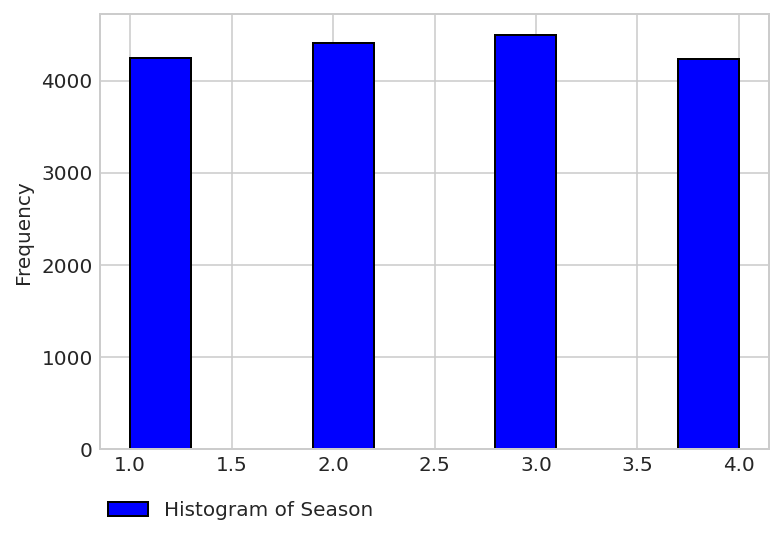

In [15]:
all_df['season'].plot.hist(bins=10, color='blue', label='Histogram of Season', edgecolor='black')
plt.legend(bbox_to_anchor=(0, -0.1), loc='upper left', borderaxespad=0, fontsize=10)
print(all_df['season'].unique())

[1 2 3 4]


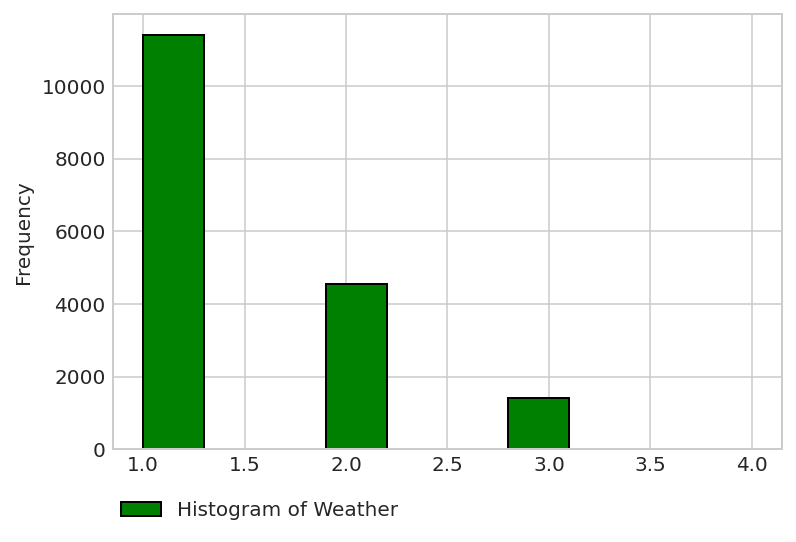

In [16]:
all_df['weather'].plot.hist(bins=10, color='green', label='Histogram of Weather', edgecolor='black')
plt.legend(bbox_to_anchor=(0, -0.1), loc='upper left', borderaxespad=0, fontsize=10)
print(all_df['weather'].unique())

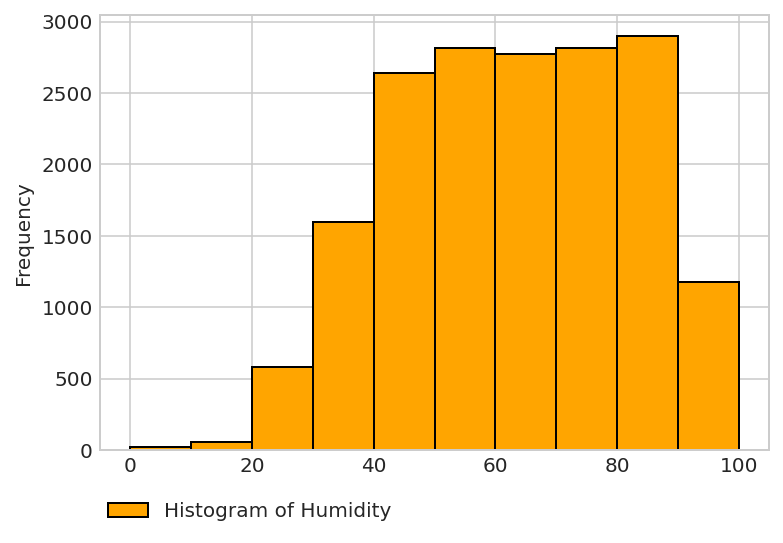

In [17]:
all_df['humidity'].plot.hist(bins=10, color='orange', label='Histogram of Humidity', edgecolor='black')
plt.legend(bbox_to_anchor=(0, -0.1), loc='upper left', borderaxespad=0, fontsize=10)

[0 1]


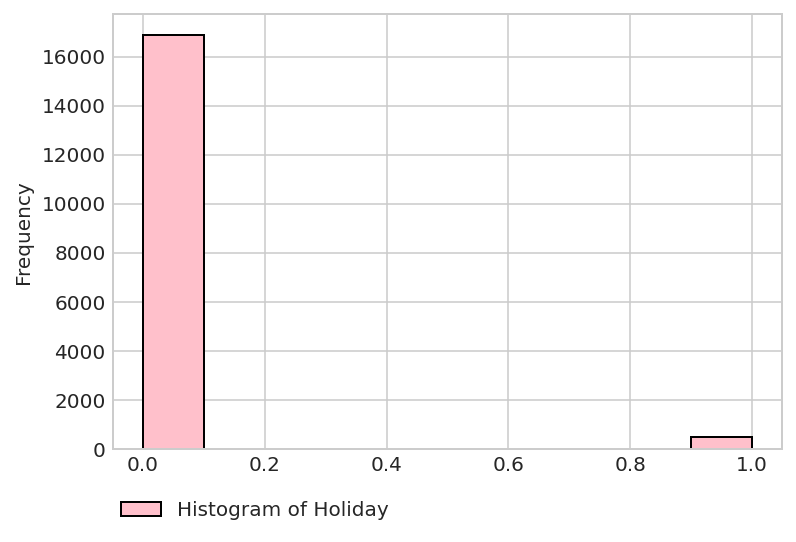

In [18]:
all_df['holiday'].plot.hist(bins=10, color='pink', label='Histogram of Holiday', edgecolor='black')
plt.legend(bbox_to_anchor=(0, -0.1), loc='upper left', borderaxespad=0, fontsize=10)
print(all_df['holiday'].unique())

[0 1]


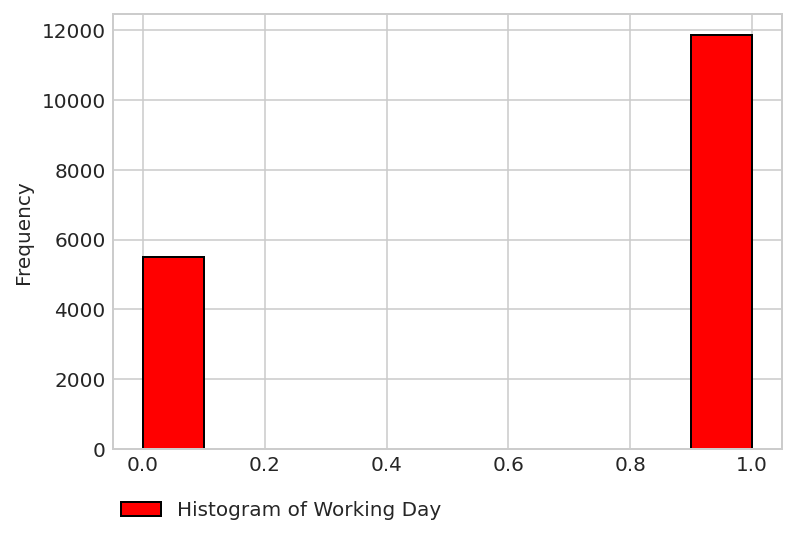

In [19]:
all_df['workingday'].plot.hist(bins=10, color='red', label='Histogram of Working Day', edgecolor='black')
plt.legend(bbox_to_anchor=(0, -0.1), loc='upper left', borderaxespad=0, fontsize=10)
print(all_df['workingday'].unique())

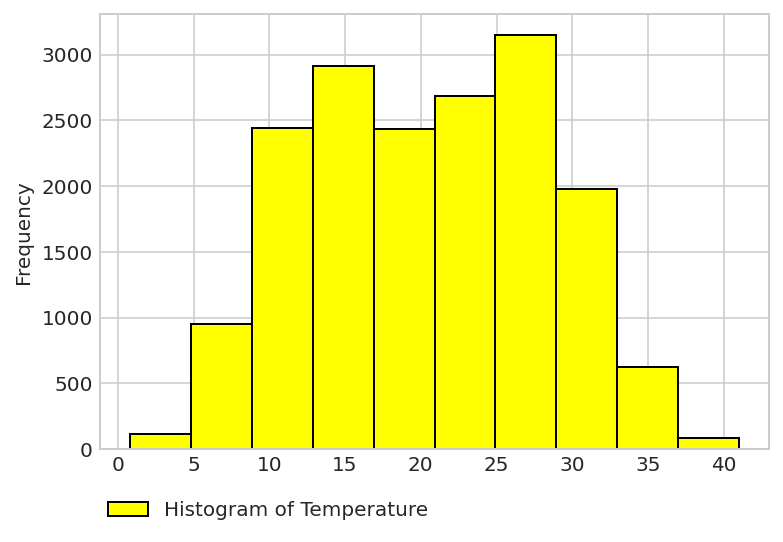

In [20]:
all_df['temp'].plot.hist(bins=10, color='yellow', label='Histogram of Temperature', edgecolor='black')
plt.legend(bbox_to_anchor=(0, -0.1), loc='upper left', borderaxespad=0, fontsize=10)

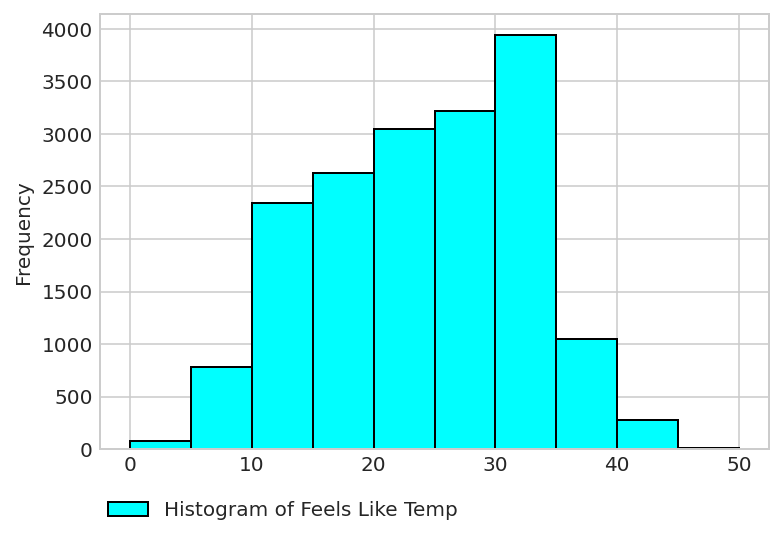

In [21]:
all_df['atemp'].plot.hist(bins=10, color='cyan', label='Histogram of Feels Like Temp', edgecolor='black')
plt.legend(bbox_to_anchor=(0, -0.1), loc='upper left', borderaxespad=0, fontsize=10)

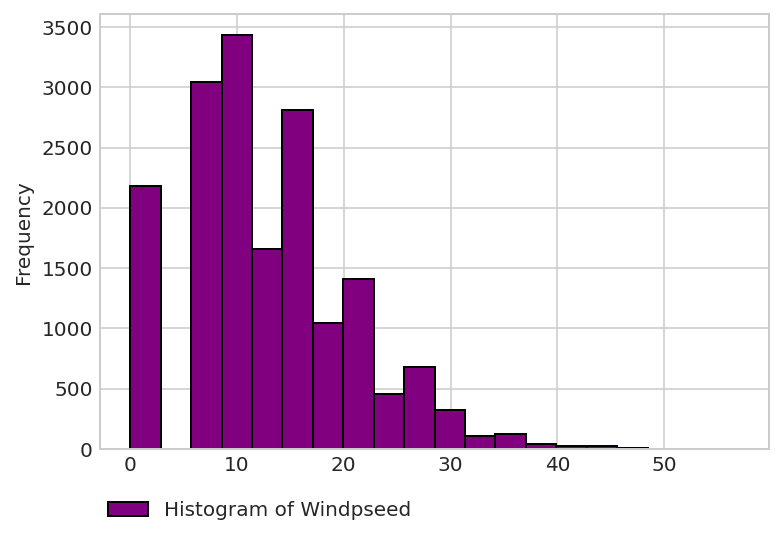

In [22]:
all_df['windspeed'].plot.hist(bins=20, color='purple', label='Histogram of Windpseed', edgecolor='black')
plt.legend(bbox_to_anchor=(0, -0.1), loc='upper left', borderaxespad=0, fontsize=10)

In [23]:
all_df['date'] = dt.date # yyyymmdd
all_df['day'] = dt.day # dd
all_df['month'] = dt.month # mm
all_df['year'] = dt.year # yyyy
all_df['hour'] = dt.hour # hh
all_df['dow'] = dt.dayofweek #曜日 Mon:0 Tue:1 Wed:2 Thu:3 Fri:4 Sat:5 Sun:6
all_df['woy'] = dt.isocalendar().week #その日の週が年間で見ると何番目の週かを表す数字 [dt.weekofyear]は deprecated

print(all_df['woy'].unique())
# How many columns have null values
all_df.isnull().sum()

<IntegerArray>
[52,  1,  2,  3,  5,  6,  7,  9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 22,
 23, 24, 26, 27, 28, 29, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45,
 46, 48, 49, 50, 51, 12, 25, 47,  4,  8, 21, 30, 34, 43]
Length: 52, dtype: UInt32


datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
data_set      0
date          0
day           0
month         0
year          0
hour          0
dow           0
woy           0
dtype: int64

In [24]:
# logarithmic transformation of dependent cols
# (adding 1 first so that 0 values don't become -inf)
for col in ['casual', 'registered', 'count']:
    all_df[f'{col}_log'] = np.log(all_df[col] + 1)

train_df = all_df[all_df['data_set'] == 'train'].copy()


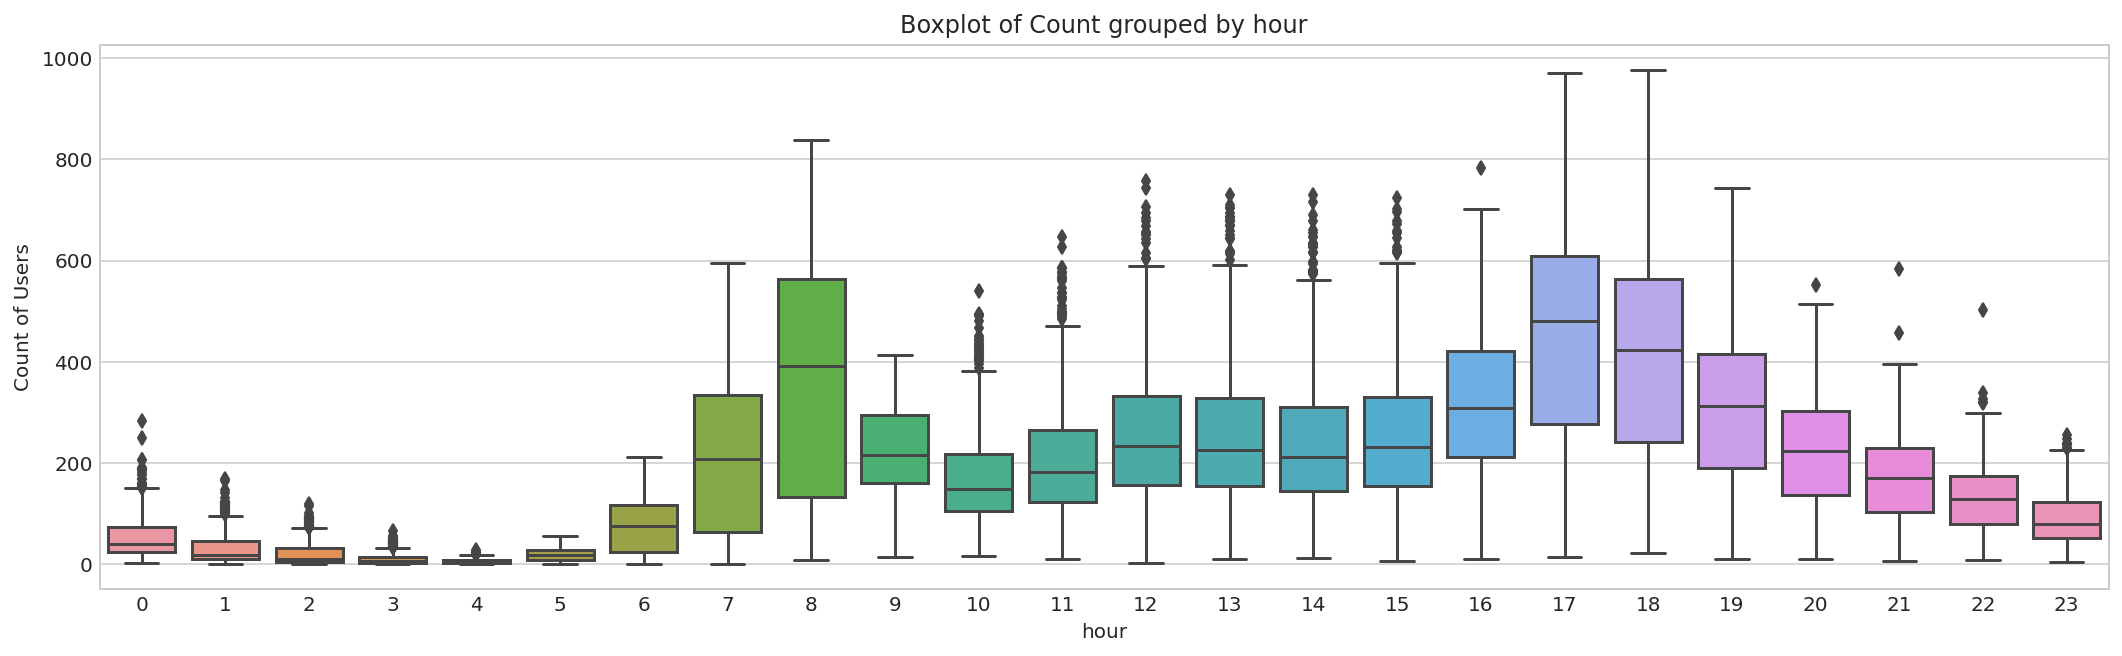

In [25]:

#train_df.boxplot(column='count', by='hour', figsize=(15,5))
#plt.ylabel('Count of Users')
#plt.title("Boxplot of Count grouped by hour")
#plt.suptitle("") # get rid of the pandas autogenerated title
fig, ax = plt.subplots(figsize=(18, 5))
sns.boxplot(x=train_df['hour'], y=train_df['count'], ax=ax)
ax.set_ylabel('Count of Users')
ax.set_title("Boxplot of Count grouped by hour");
#plt.suptitle("") # get rid of the pandas autogenerated title

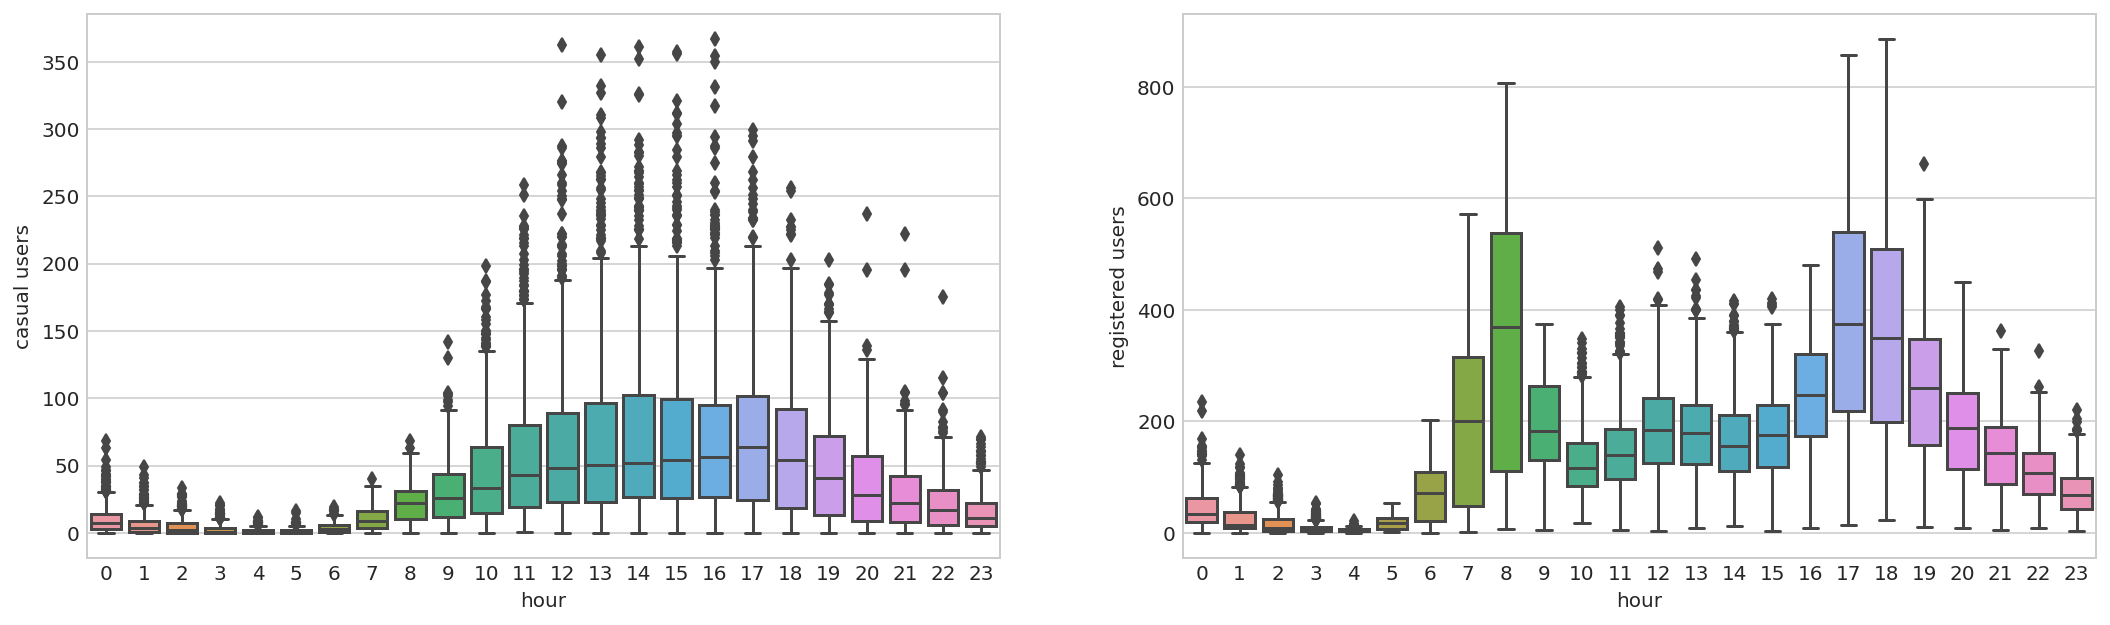

In [26]:
#fig, axs = plt.subplots(1, 2, figsize=(15,5), sharex=False, sharey=False)

#train_df.boxplot(column='casual', by='hour', ax=axs[0])
#axs[0].set_ylabel('casual users')
#axs[0].set_title('')

#train_df.boxplot(column='registered', by='hour', ax=axs[1])
#axs[1].set_ylabel('registered users')
#axs[1].set_title('')

fig, axs = plt.subplots(1, 2, figsize=(18,5), sharex=False, sharey=False)

sns.boxplot(x='hour', y='casual', data=train_df, ax=axs[0])
axs[0].set_ylabel('casual users')
axs[0].set_title('')

sns.boxplot(x='hour', y='registered', data=train_df, ax=axs[1])
axs[1].set_ylabel('registered users')
axs[1].set_title('');

In [27]:
# rentals by hour, split by working day (or not)
by_hour = train_df.groupby(['hour', 'workingday'])['count'].agg('sum').unstack()
by_hour.head(3)

workingday,0,1
hour,,
0,13701,11387
1,10427,4945
2,7686,2573


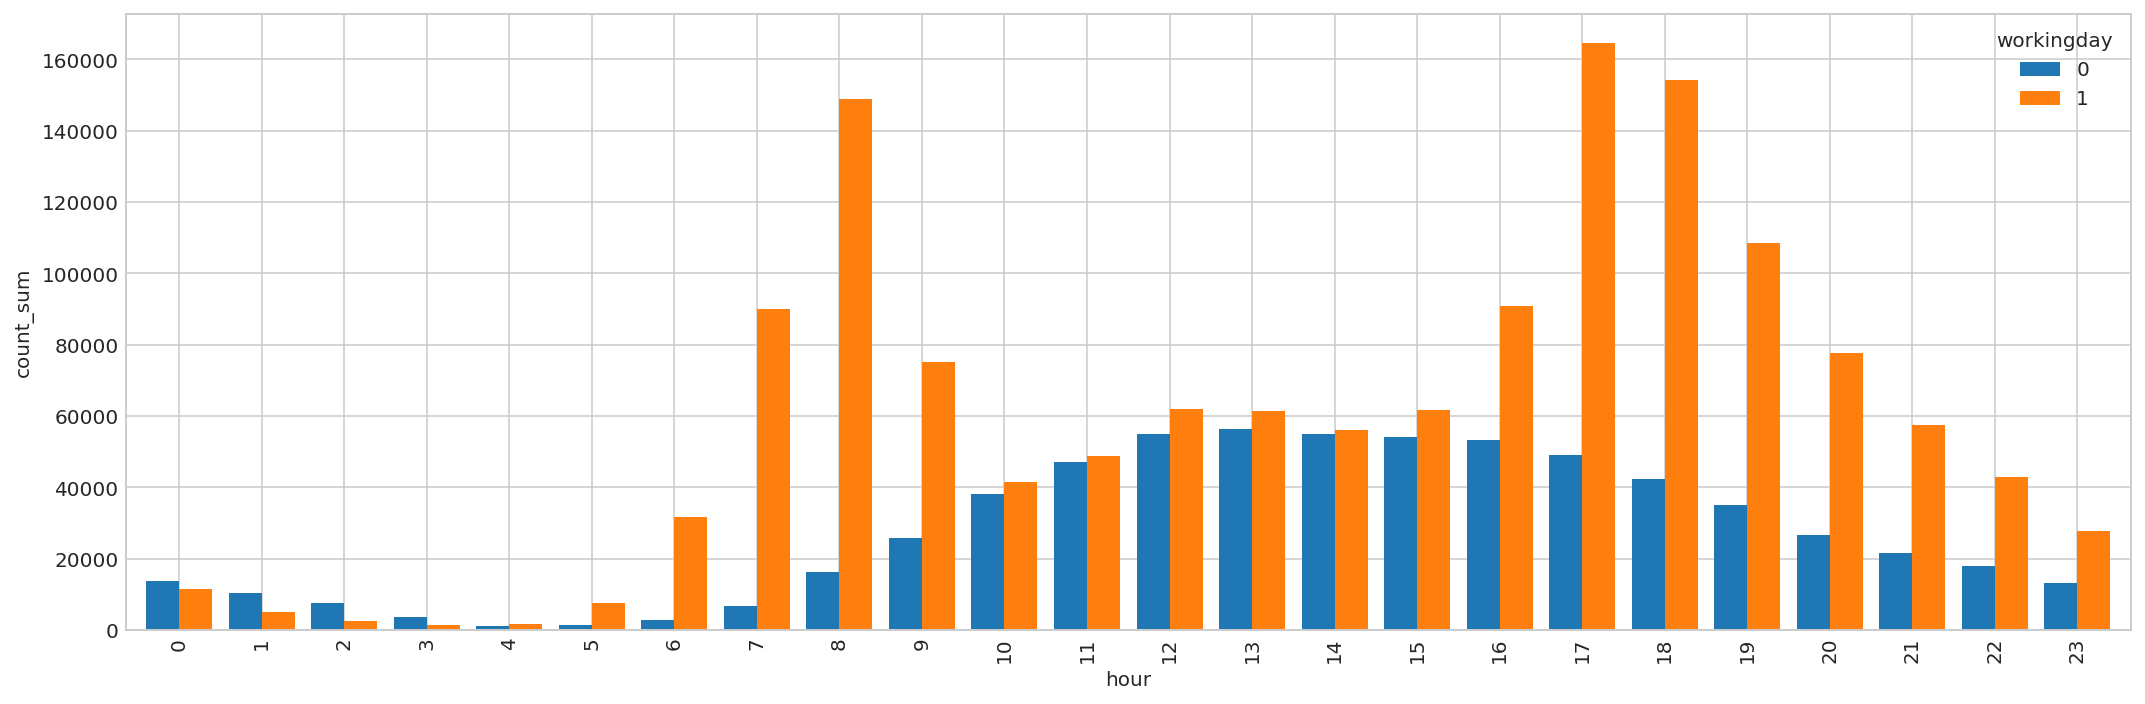

In [28]:
by_hour.plot(kind='bar', figsize=(15,5), width=0.8)
plt.grid(True)
plt.ylabel('count_sum')
plt.tight_layout()

In [29]:
workingday_map = {0:'Weekend or Holiday', 1:'Workingday'}
data = train_df.groupby(["hour","workingday"])["count"].mean().reset_index()
data['workingday'] = data['workingday'].map(lambda d : workingday_map[d])
data = data.rename(columns={'count':'mean'})
data.head(10) #.sample(n=5)

,hour,workingday,mean
0,0,Weekend or Holiday,94.489655
1,0,Workingday,36.732258
2,1,Weekend or Holiday,71.910345
3,1,Workingday,16.003236
4,2,Weekend or Holiday,53.748252
5,2,Workingday,8.436066
6,3,Weekend or Holiday,25.534722
7,3,Workingday,4.892734
8,4,Weekend or Holiday,8.544828
9,4,Workingday,5.363636


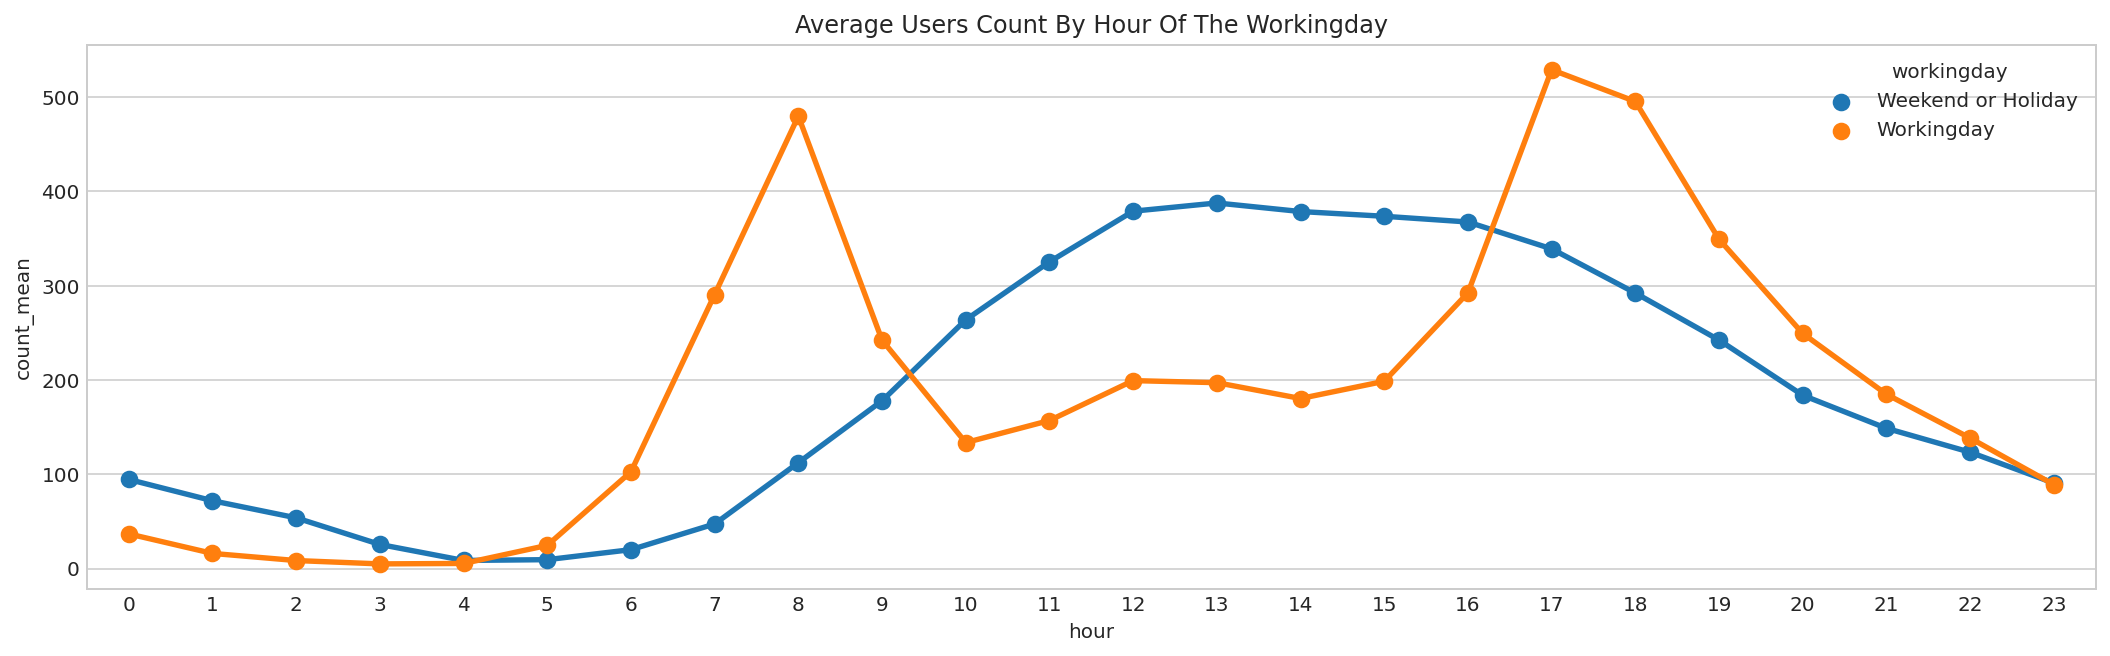

In [30]:
#peakの説明用
fig, ax = plt.subplots(figsize=(18, 5))
sns.pointplot(x=data["hour"], y=data["mean"], hue=data["workingday"], ax=ax)
ax.set(xlabel='hour', ylabel='count_mean', title="Average Users Count By Hour Of The Workingday");

In [31]:
pd.melt(train_df[["hour","casual","registered"]], id_vars=['hour'], value_vars=['casual', 'registered'], var_name='usertype', value_name='count')

,hour,usertype,count
0,0,casual,3
1,1,casual,8
2,2,casual,5
3,3,casual,3
4,4,casual,0
...,...,...,...
21767,19,registered,329
21768,20,registered,231
21769,21,registered,164
21770,22,registered,117


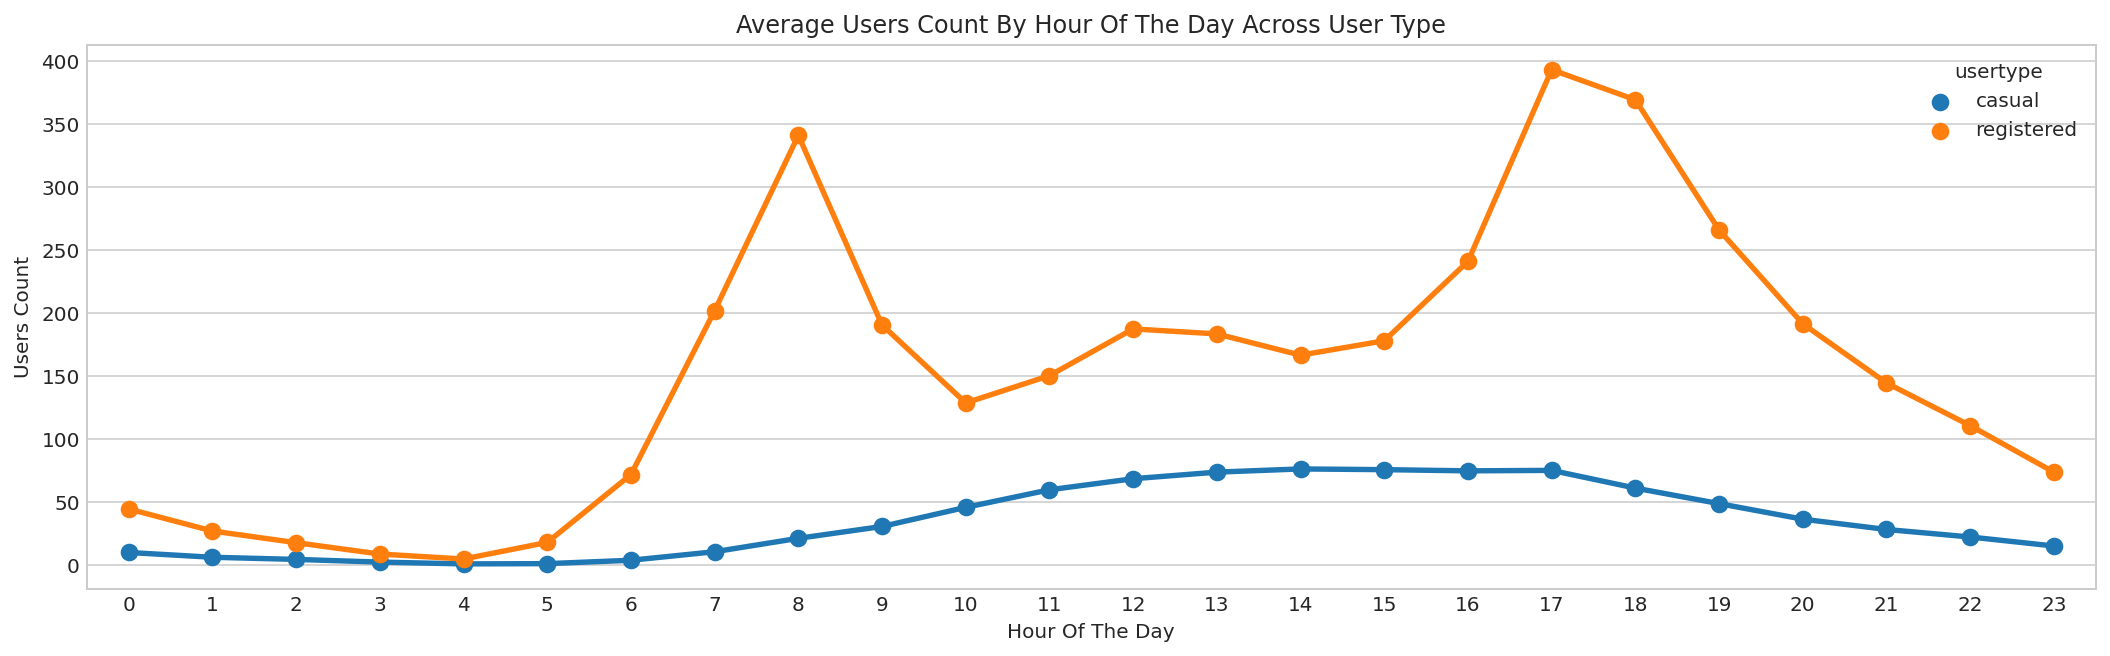

In [32]:
fig, ax = plt.subplots(figsize=(18, 5))
train_df_melt = pd.melt(train_df[["hour","casual","registered"]], id_vars=['hour'], value_vars=['casual', 'registered'], var_name='usertype', value_name='count')
data = pd.DataFrame(train_df_melt.groupby(["hour", "usertype"], sort=True)["count"].mean()).reset_index()
sns.pointplot(x=data["hour"], y=data["count"], hue=data["usertype"], hue_order=["casual","registered"], ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Users Count', title='Average Users Count By Hour Of The Day Across User Type');

[Text(0, 0.5, 'log(count) of Users'),
 Text(0.5, 1.0, 'Boxplot of Log of Count grouped by hour')]

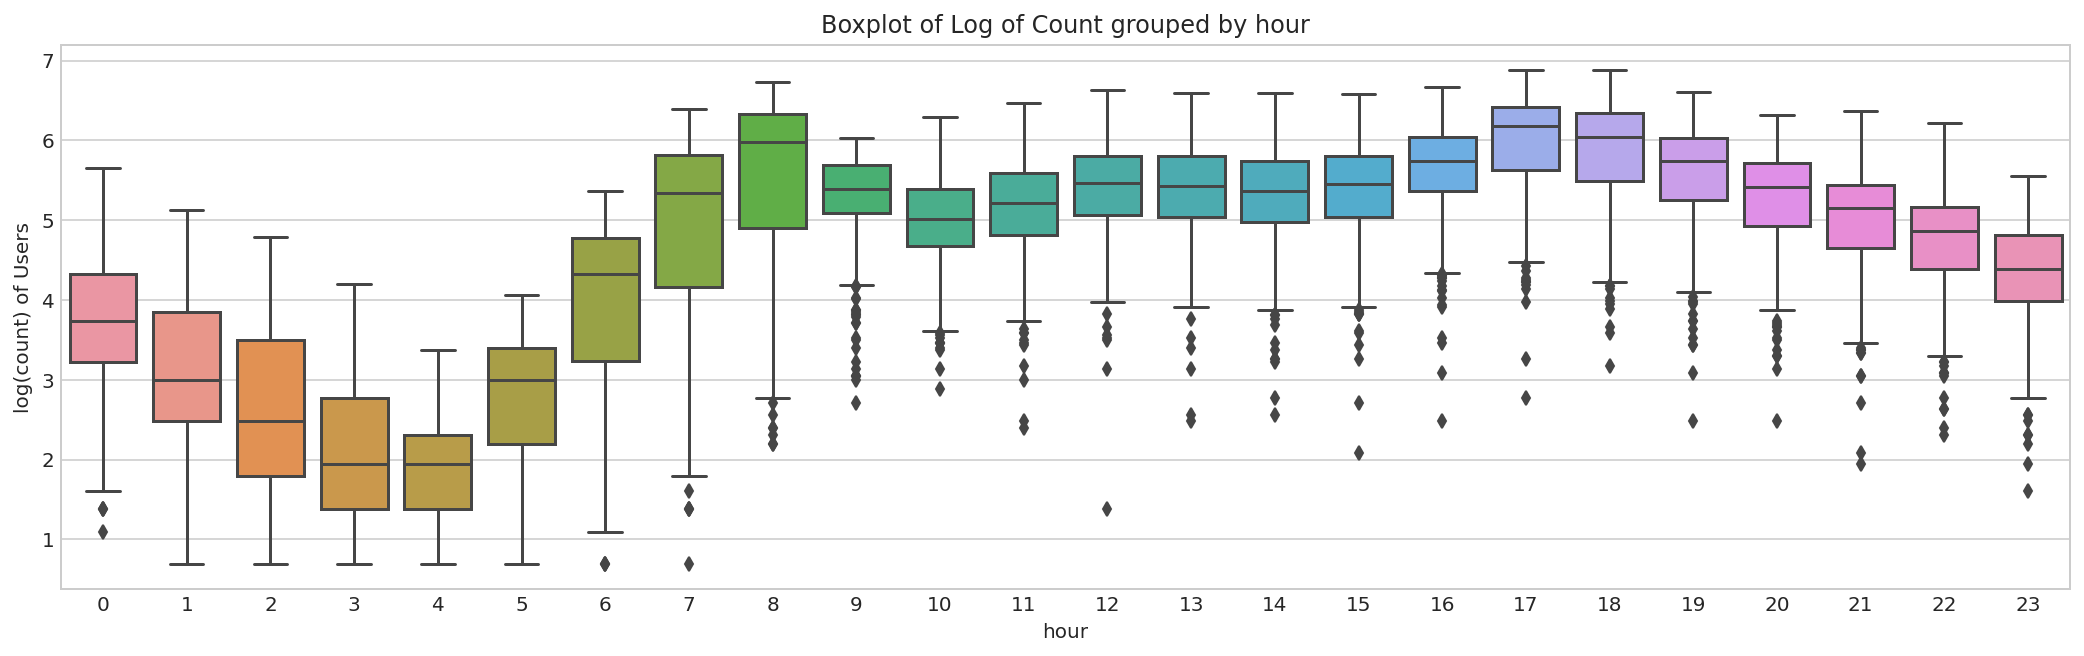

In [33]:
#train_df = train_df.assign(log_count = lambda df : np.log(train_df['count']))

fig, ax = plt.subplots(figsize=(18, 5))
sns.boxplot(x='hour', y='count_log', data=train_df, ax=ax)
ax.set(ylabel='log(count) of Users',title='Boxplot of Log of Count grouped by hour')

#plt.suptitle("") # get rid of the pandas autogenerated title
#train_df.drop(['log_count'], axis = 1, inplace=True);

<AxesSubplot:>

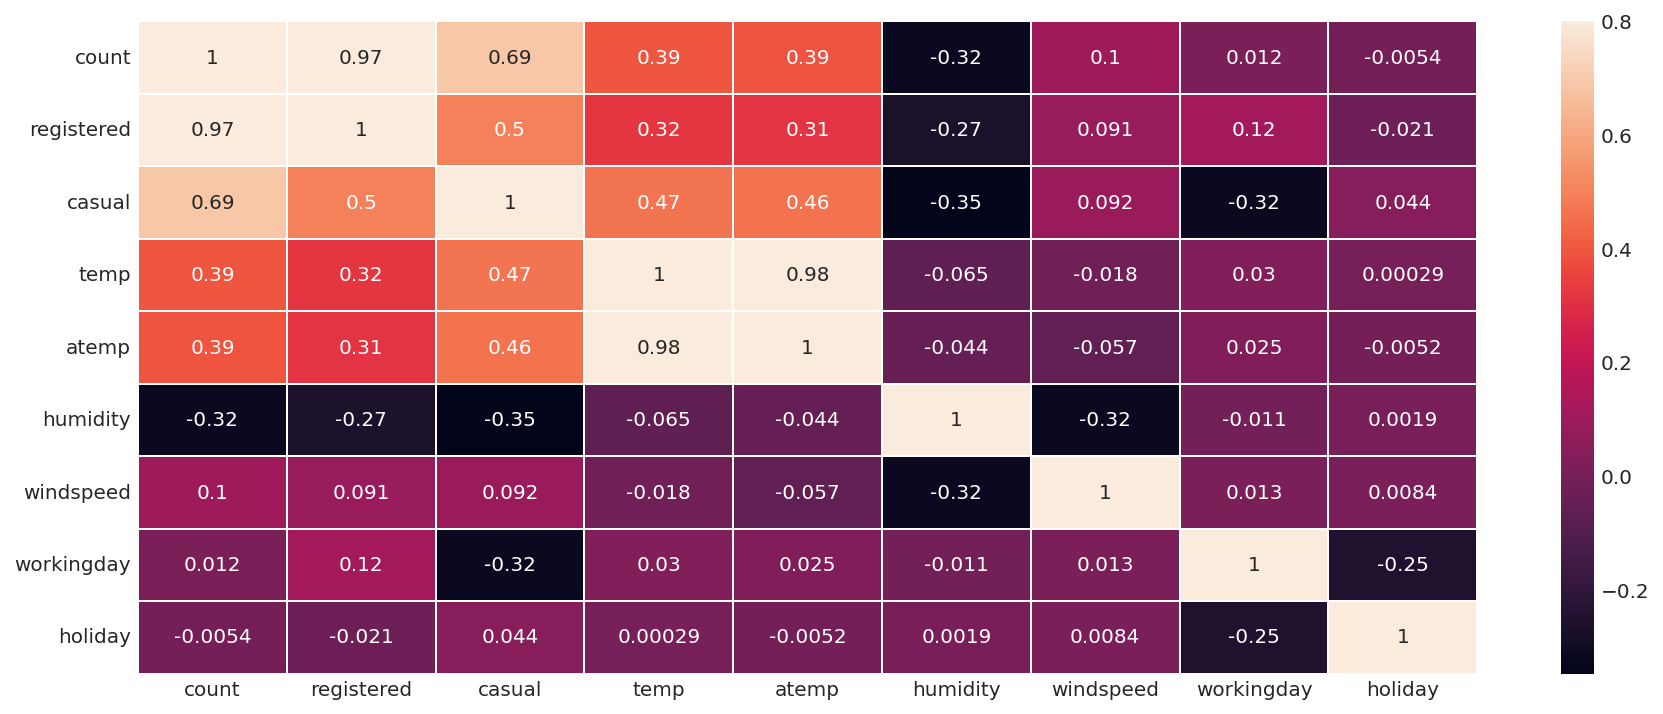

In [34]:
sub_df = train_df[['count', 'registered', 'casual', 'temp', 'atemp', 'humidity', 'windspeed', 'workingday', 'holiday']]
sub_df.corr()
corrMatt = sub_df.corr()
#mask = np.zeros_like(corrMatt)
#mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(corrMatt,  vmax=0.8, square=False, annot=True, ax=ax, linewidths=1)#mask=mask,

<AxesSubplot:xlabel='hour', ylabel='count'>

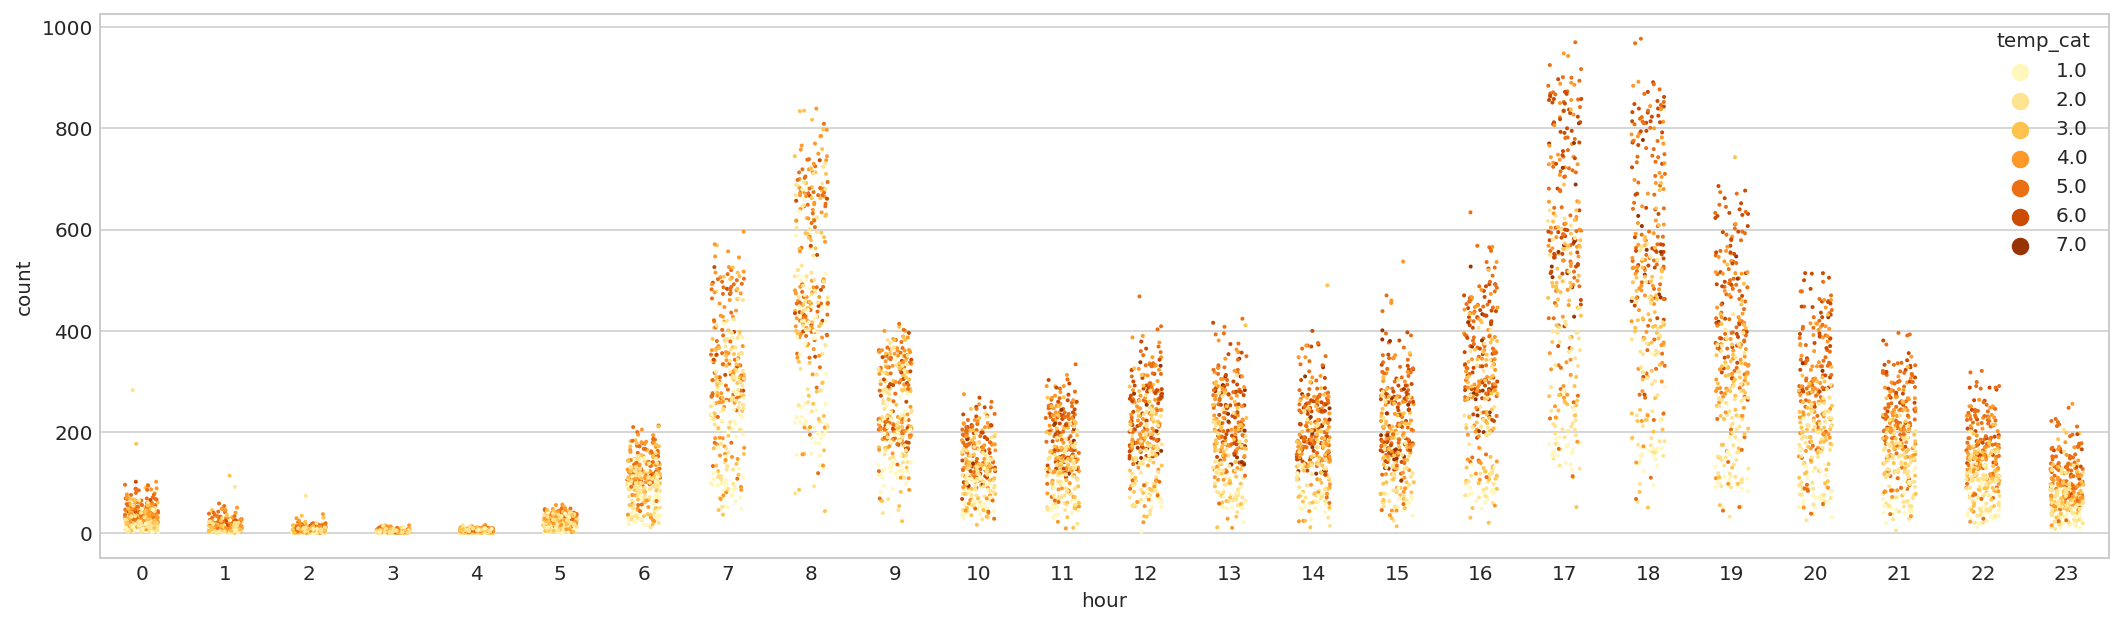

In [35]:
train_df.loc[train_df['temp'] < 10,'temp_cat'] = 1
train_df.loc[(train_df['temp'] >= 10) & (train_df['temp'] < 15),'temp_cat'] = 2
train_df.loc[(train_df['temp'] >= 15) & (train_df['temp'] < 20),'temp_cat'] = 3
train_df.loc[(train_df['temp'] >= 20) & (train_df['temp'] < 25),'temp_cat'] = 4
train_df.loc[(train_df['temp'] >= 25) & (train_df['temp'] < 30),'temp_cat'] = 5
train_df.loc[(train_df['temp'] >= 30) & (train_df['temp'] < 35),'temp_cat'] = 6
train_df.loc[(train_df['temp'] >= 35),'temp_cat'] = 7

fig, ax = plt.subplots(figsize=(18, 5))
sns.stripplot(x='hour', y='count', data=train_df[train_df['workingday'] == 1], hue='temp_cat',ax=ax,
              jitter=0.2, palette="YlOrBr", size=2)#palette='Dark2
#train_df.drop('hour_jitter', axis=1, inplace=True);

<AxesSubplot:xlabel='temp_cat', ylabel='count'>

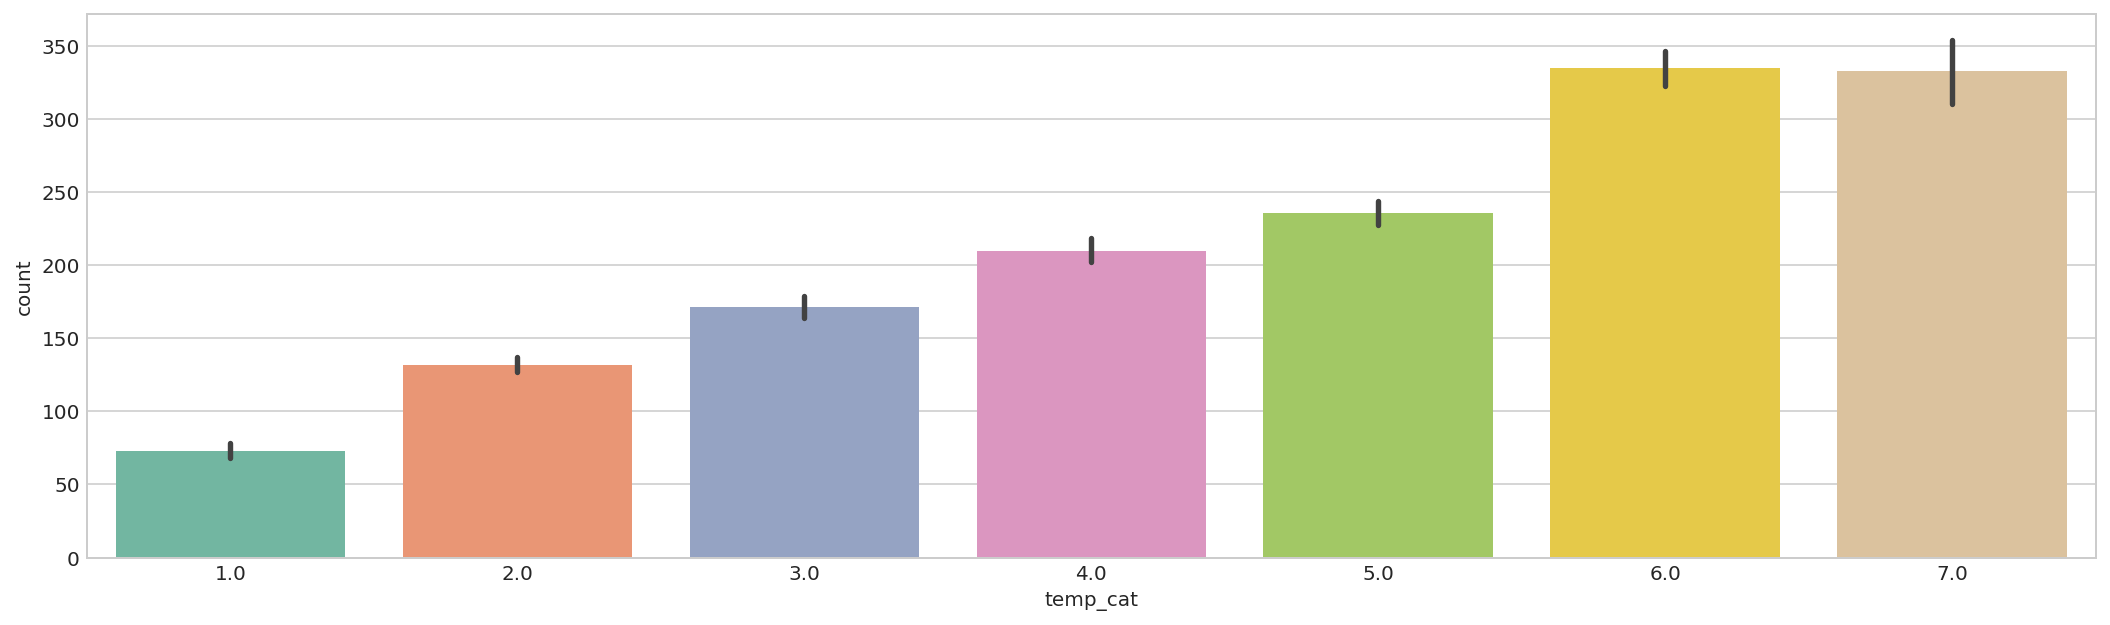

In [36]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.barplot(x='temp_cat', y='count', data=train_df, palette='Set2')

In [37]:
train_df.loc[train_df['windspeed'] < 5,'wind_cat'] = 0
train_df.loc[(train_df['windspeed'] >= 5) & (train_df['windspeed'] < 10),'wind_cat'] = 1
train_df.loc[(train_df['windspeed'] >= 10) & (train_df['windspeed'] < 15),'wind_cat'] = 2
train_df.loc[(train_df['windspeed'] >= 15) & (train_df['windspeed'] < 20),'wind_cat'] = 3
train_df.loc[(train_df['windspeed'] >= 20) & (train_df['windspeed'] < 25),'wind_cat'] = 4
train_df.loc[(train_df['windspeed'] >= 25) & (train_df['windspeed'] < 30),'wind_cat'] = 5
train_df.loc[(train_df['windspeed'] >= 30) & (train_df['windspeed'] < 35),'wind_cat'] = 6
train_df.loc[(train_df['windspeed'] >= 35) & (train_df['windspeed'] < 40),'wind_cat'] = 7
train_df.loc[(train_df['windspeed'] >= 40) & (train_df['windspeed'] < 45),'wind_cat'] = 8
train_df.loc[(train_df['windspeed'] >= 45),'wind_cat'] = 9

<AxesSubplot:xlabel='wind_cat', ylabel='count'>

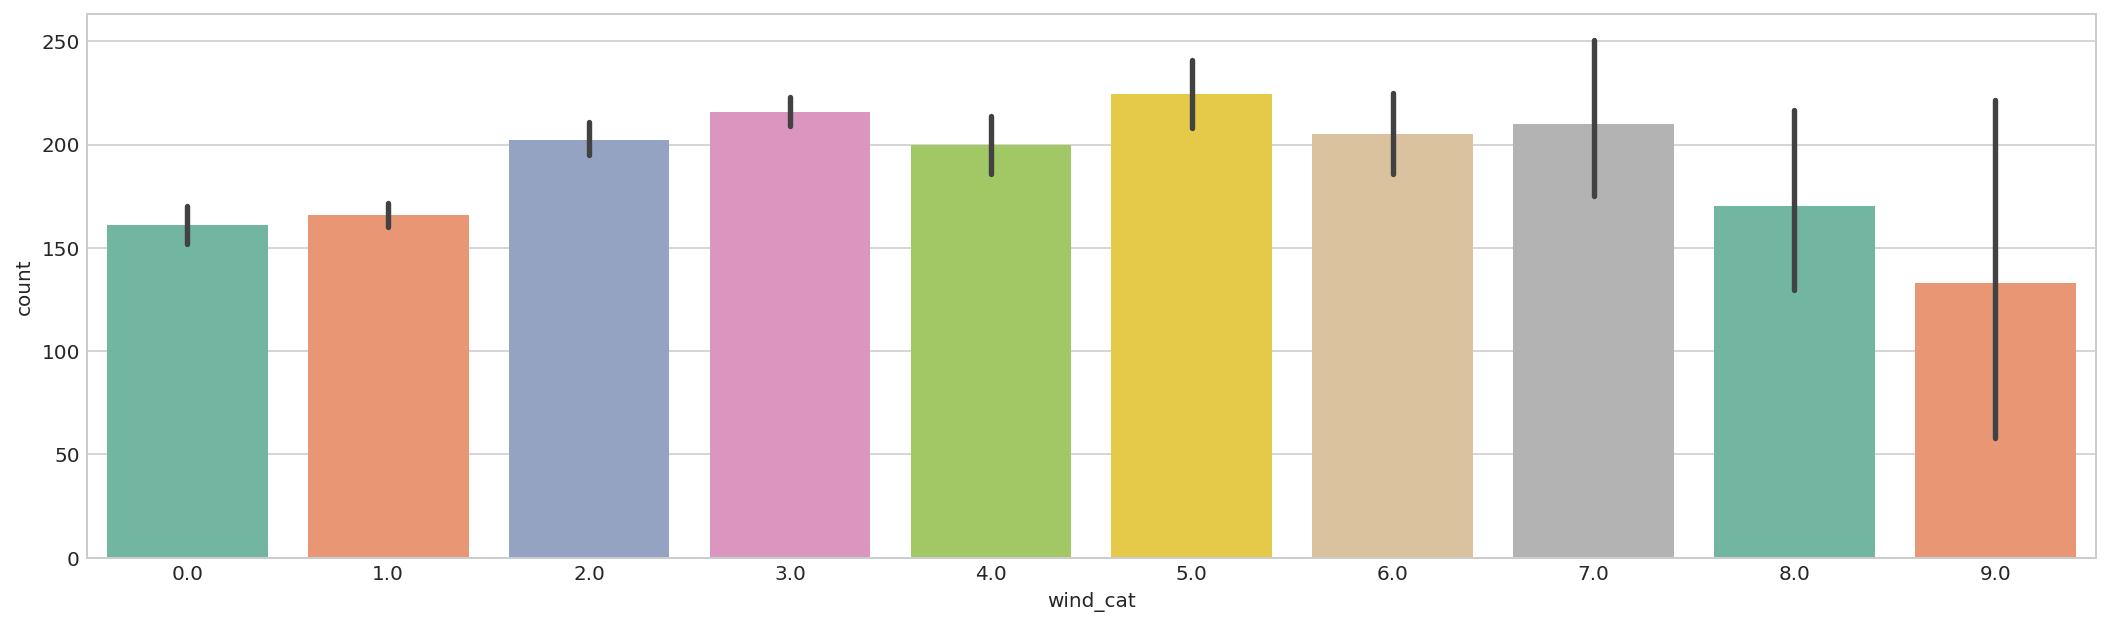

In [38]:
# tempとwindはidealの説明
fig, ax = plt.subplots(figsize=(18, 5))
sns.barplot(x='wind_cat', y='count', data=train_df, palette='Set2')

In [39]:
train_df.loc[train_df['humidity'] < 10,'humidity_cat'] = 0
train_df.loc[(train_df['humidity'] >= 10) & (train_df['humidity'] < 20),'humidity_cat'] = 1
train_df.loc[(train_df['humidity'] >= 20) & (train_df['humidity'] < 30),'humidity_cat'] = 2
train_df.loc[(train_df['humidity'] >= 30) & (train_df['humidity'] < 40),'humidity_cat'] = 3
train_df.loc[(train_df['humidity'] >= 40) & (train_df['humidity'] < 50),'humidity_cat'] = 4
train_df.loc[(train_df['humidity'] >= 50) & (train_df['humidity'] < 60),'humidity_cat'] = 5
train_df.loc[(train_df['humidity'] >= 60) & (train_df['humidity'] < 70),'humidity_cat'] = 6
train_df.loc[(train_df['humidity'] >= 70) & (train_df['humidity'] < 80),'humidity_cat'] = 7
train_df.loc[(train_df['humidity'] >= 80) & (train_df['humidity'] < 90),'humidity_cat'] = 8
train_df.loc[(train_df['humidity'] >= 90),'humidity_cat'] = 9
""" train_df.loc[train_df['humidity'] < 20,'humidity_cat'] = 0
train_df.loc[(train_df['humidity'] >= 20) & (train_df['humidity'] < 40),'humidity_cat'] = 1
train_df.loc[(train_df['humidity'] >= 40) & (train_df['humidity'] < 60),'humidity_cat'] = 2
train_df.loc[(train_df['humidity'] >= 60) & (train_df['humidity'] < 80),'humidity_cat'] = 3
train_df.loc[(train_df['humidity'] >= 80),'humidity_cat'] = 4 """

" train_df.loc[train_df['humidity'] < 20,'humidity_cat'] = 0\ntrain_df.loc[(train_df['humidity'] >= 20) & (train_df['humidity'] < 40),'humidity_cat'] = 1\ntrain_df.loc[(train_df['humidity'] >= 40) & (train_df['humidity'] < 60),'humidity_cat'] = 2\ntrain_df.loc[(train_df['humidity'] >= 60) & (train_df['humidity'] < 80),'humidity_cat'] = 3\ntrain_df.loc[(train_df['humidity'] >= 80),'humidity_cat'] = 4 "

<AxesSubplot:xlabel='humidity_cat', ylabel='count'>

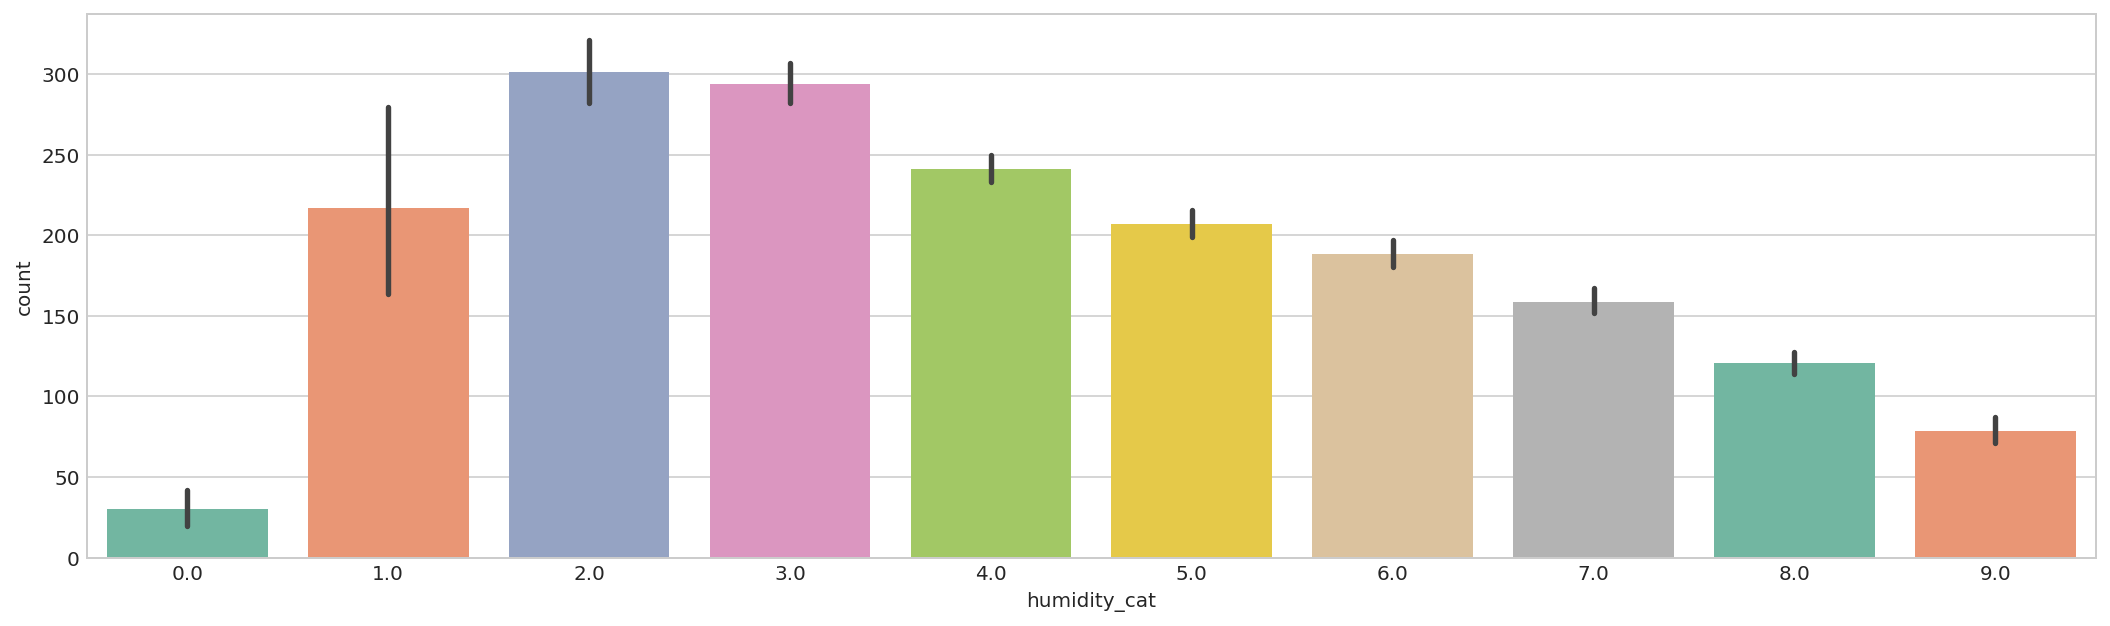

In [40]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.barplot(x='humidity_cat', y='count', data=train_df, palette='Set2')

<AxesSubplot:xlabel='humidity_cat', ylabel='count'>

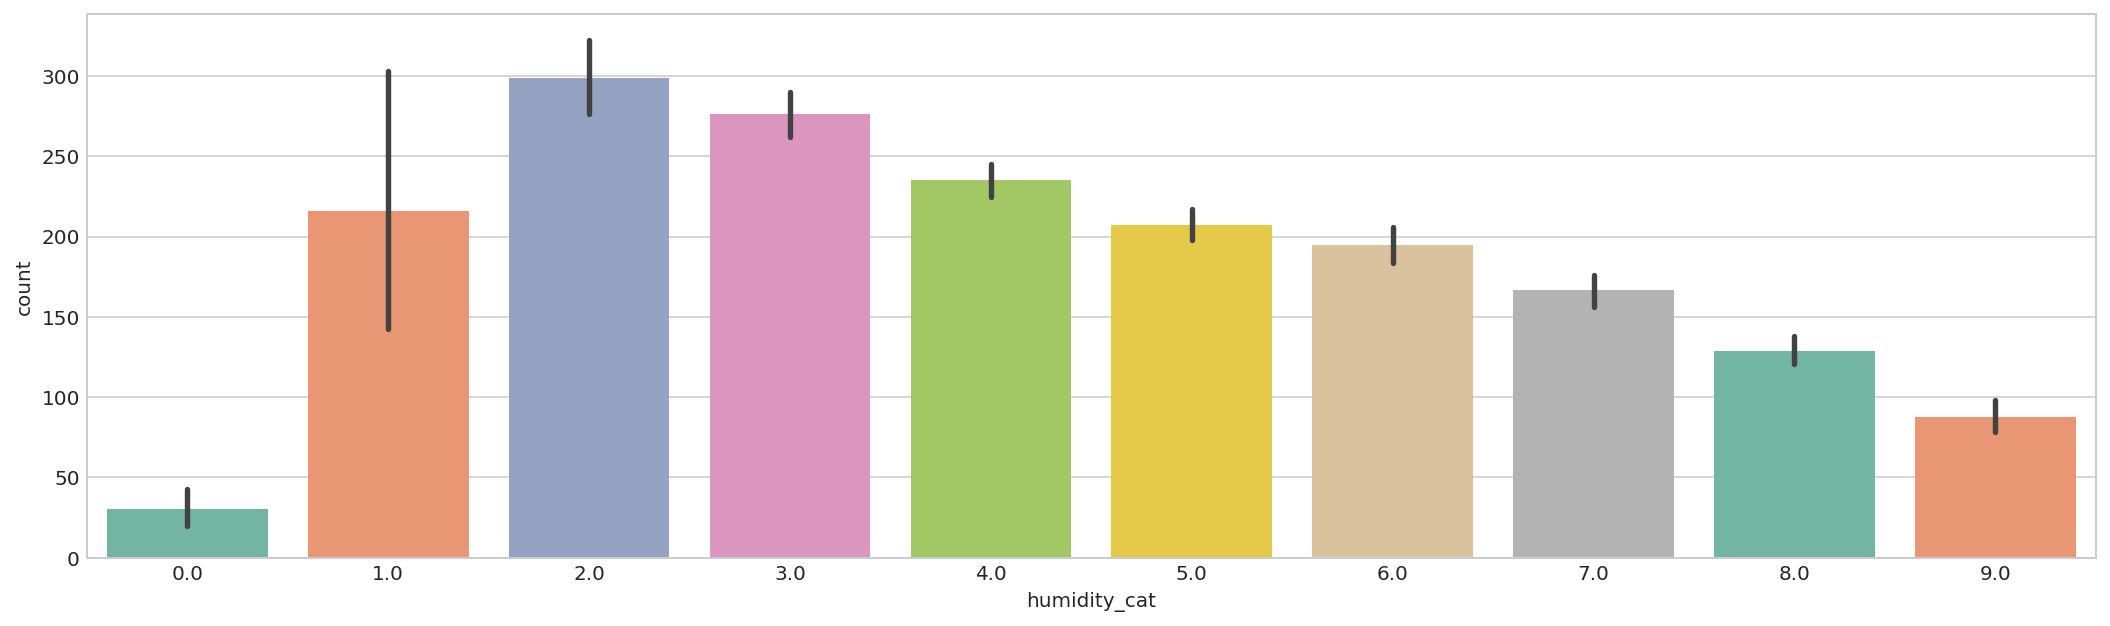

In [41]:
# Sticky用の説明
data = train_df[['workingday','humidity_cat','casual','registered','count']].query('workingday == 1')
fig, ax = plt.subplots(figsize=(18, 5))
sns.barplot(x='humidity_cat', y='count', data=data, palette='Set2')

<AxesSubplot:xlabel='humidity_cat', ylabel='count'>

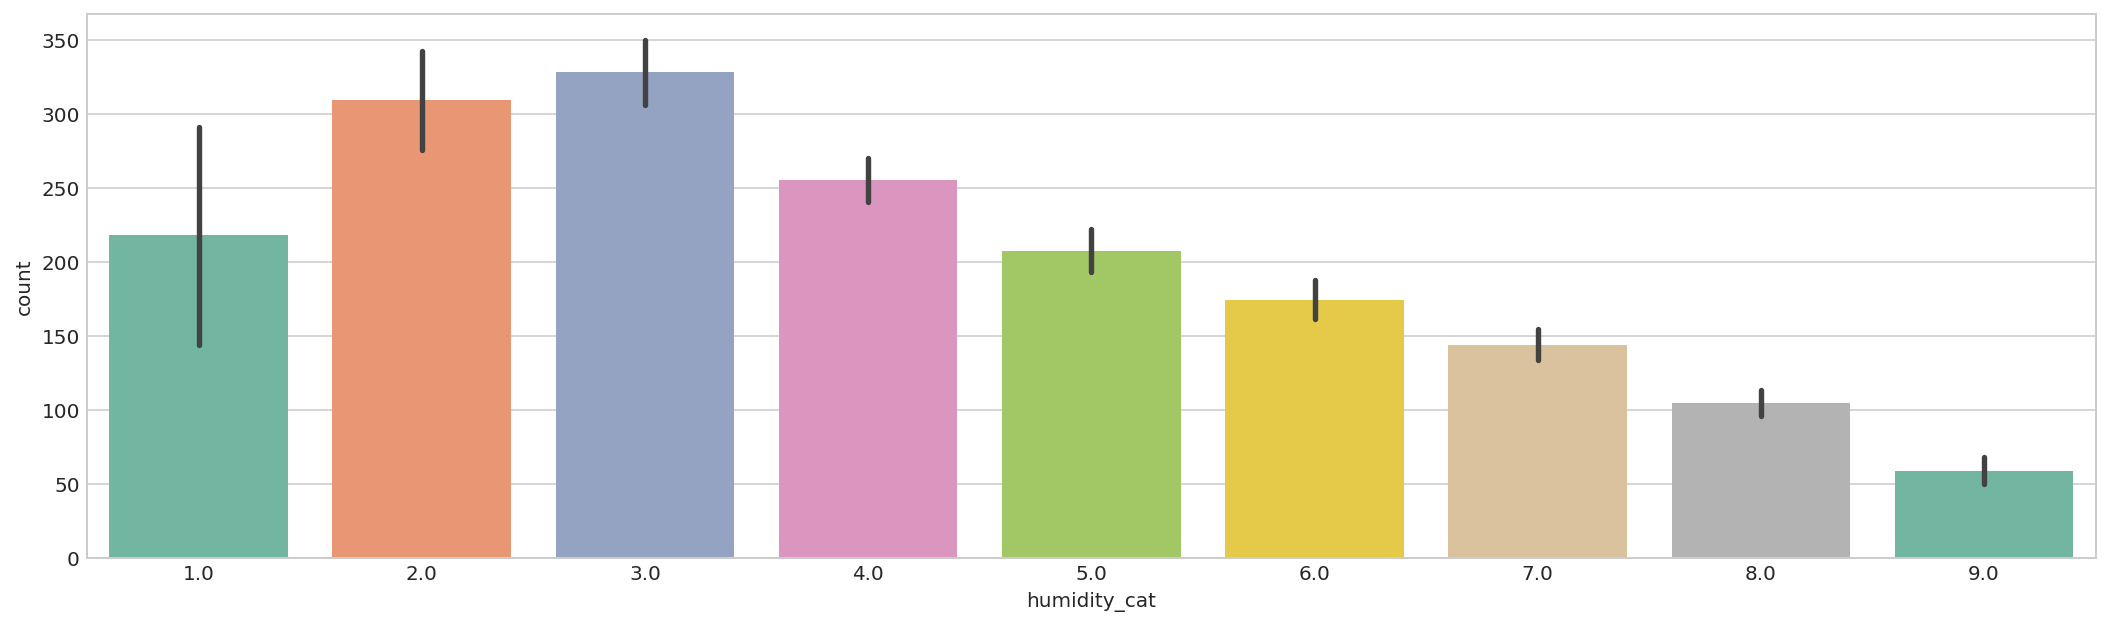

In [42]:
# Sticky用の説明
data = train_df[['workingday','humidity_cat','casual','registered','count']].query('workingday == 0')
fig, ax = plt.subplots(figsize=(18, 5))
sns.barplot(x='humidity_cat', y='count', data=data, palette='Set2')

<AxesSubplot:>

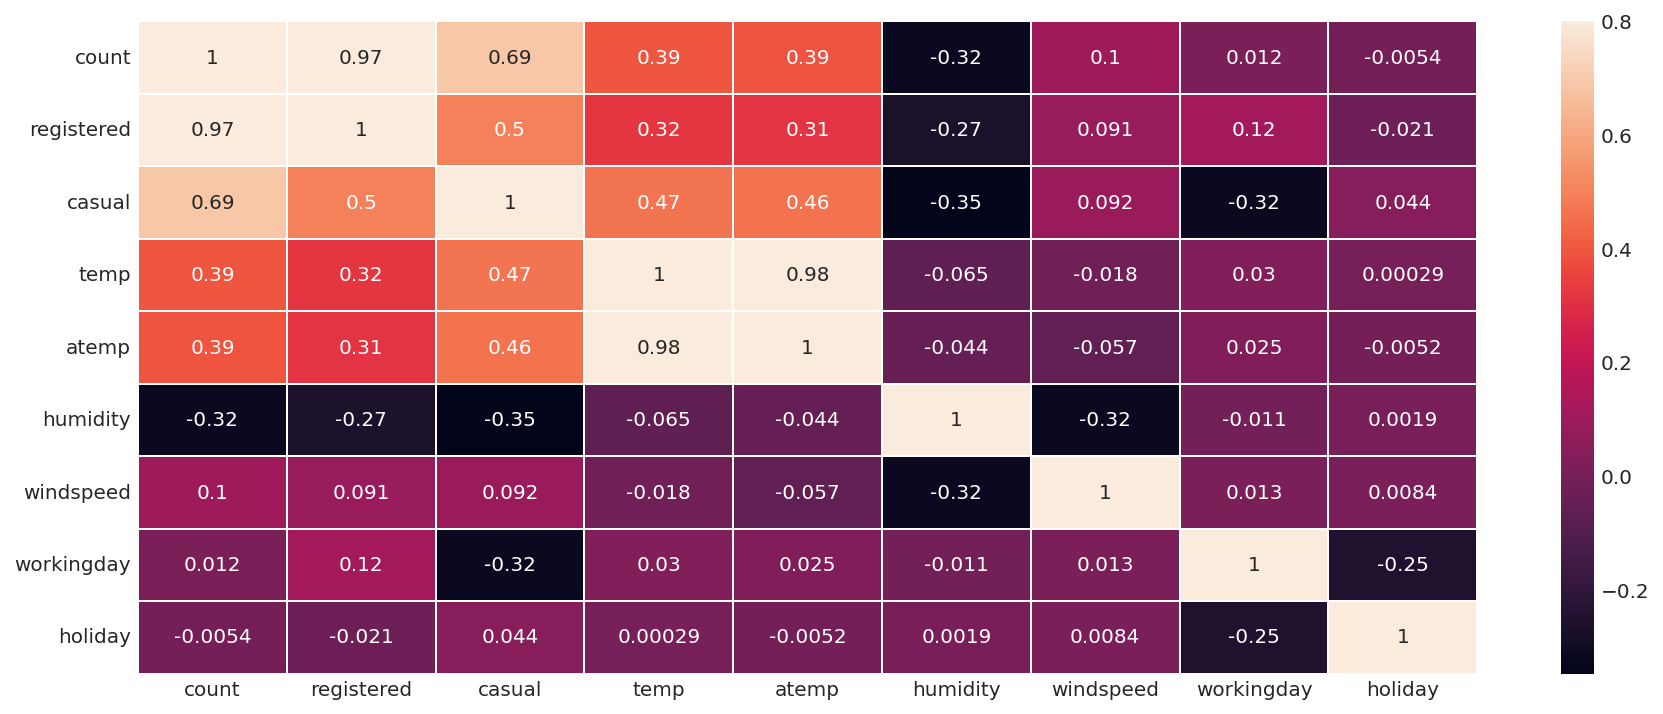

In [43]:
sub_df = train_df[['count', 'registered', 'casual', 'temp', 'atemp', 'humidity', 'windspeed', 'workingday', 'holiday']]
sub_df.corr()
corrMatt = sub_df.corr()
#mask = np.zeros_like(corrMatt)
#mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(corrMatt,  vmax=0.8, square=False, annot=True, ax=ax, linewidths=1)#mask=mask,

In [44]:
##もともとのEDA

In [45]:
season_map = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}
good_weather = all_df[all_df['weather'] == 1][['hour', 'season']].copy()
data = pd.DataFrame({'count' : good_weather.groupby(["hour","season"]).size()}).reset_index()
data['season'] = data['season'].map(lambda d : season_map[d])
print(good_weather.groupby(["hour","season"]).size())
data


hour  season
0     1         105
      2         121
      3         139
      4         124
1     1         108
               ... 
22    4         121
23    1         116
      2         123
      3         135
      4         118
Length: 96, dtype: int64


,hour,season,count
0,0,Spring,105
1,0,Summer,121
2,0,Fall,139
3,0,Winter,124
4,1,Spring,108
...,...,...,...
91,22,Winter,121
92,23,Spring,116
93,23,Summer,123
94,23,Fall,135


In [46]:
all_df[['weather','hour','season','count']].query('weather == 1 & hour == 0 & season == 1').sum()

weather     105
hour          0
season      105
count      2107
dtype: int64

[Text(0.5, 0, 'Hour Of The Day'),
 Text(0, 0.5, 'Good Weather Count'),
 Text(0.5, 1.0, 'Good Weather By Hour Of The Day Across Season')]

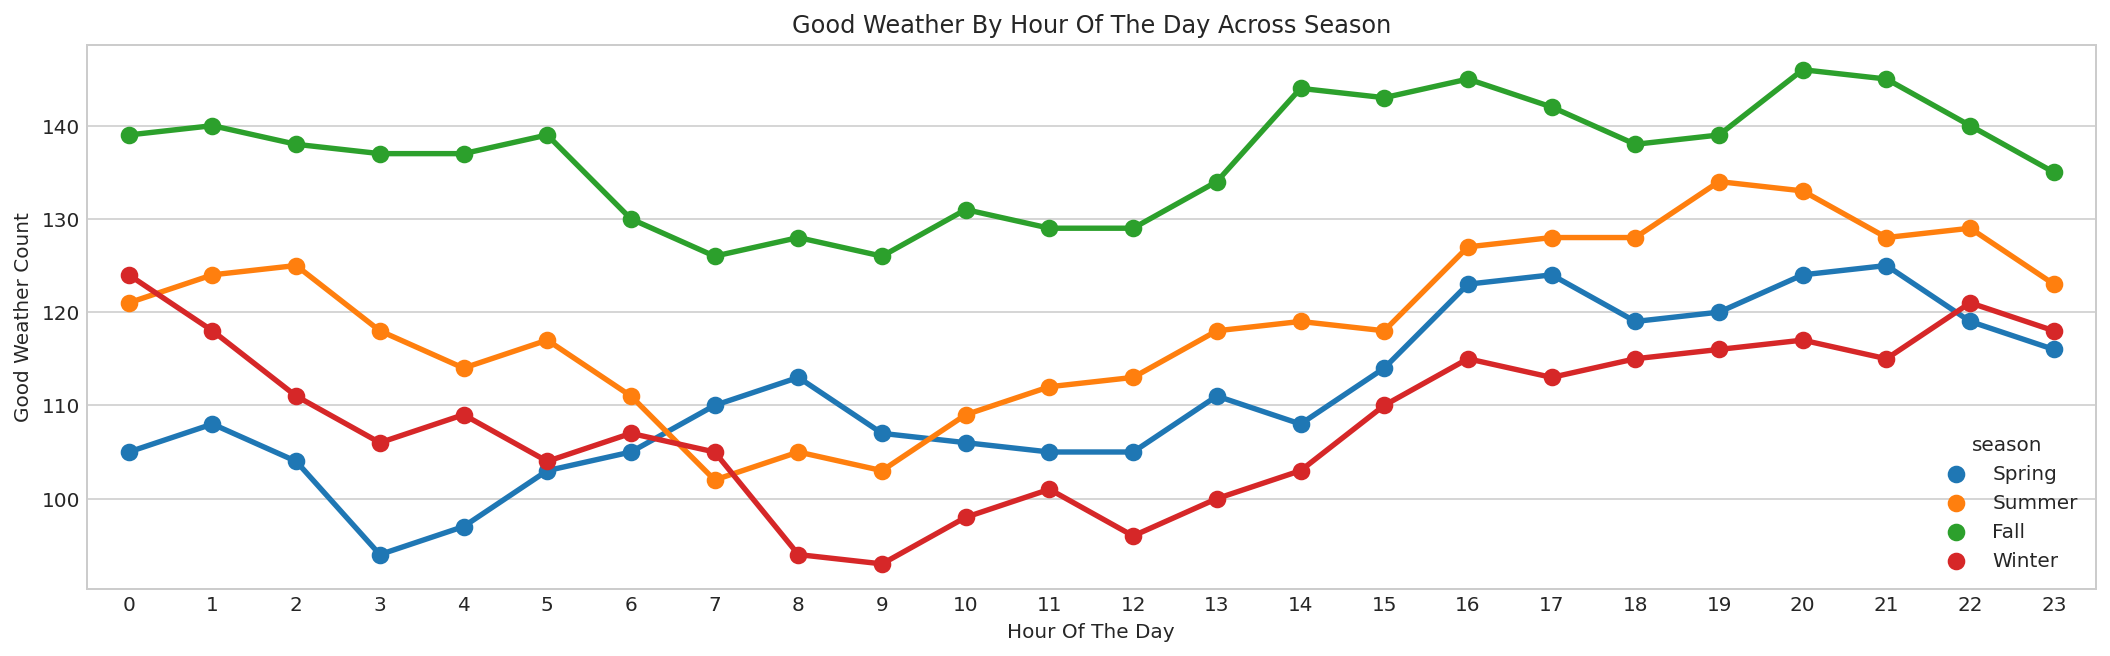

In [47]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.pointplot(x=data["hour"], y=data["count"], hue=data["season"], ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Good Weather Count', title="Good Weather By Hour Of The Day Across Season") #ここで言っているCountは、例えばSpringの該当日時の個数を表す

In [48]:
#Normal Weather happens most frequent in Spring  そんなことはない。
season_map = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}
normal_weather = all_df[all_df['weather'] == 2][['hour', 'season']].copy()
data = pd.DataFrame({'count' : normal_weather.groupby(["hour","season"]).size()}).reset_index()
data['season'] = data['season'].map(lambda d : season_map[d])
#data.sample(n=5)
data.head(3)

,hour,season,count
0,0,Spring,59
1,0,Summer,48
2,0,Fall,36


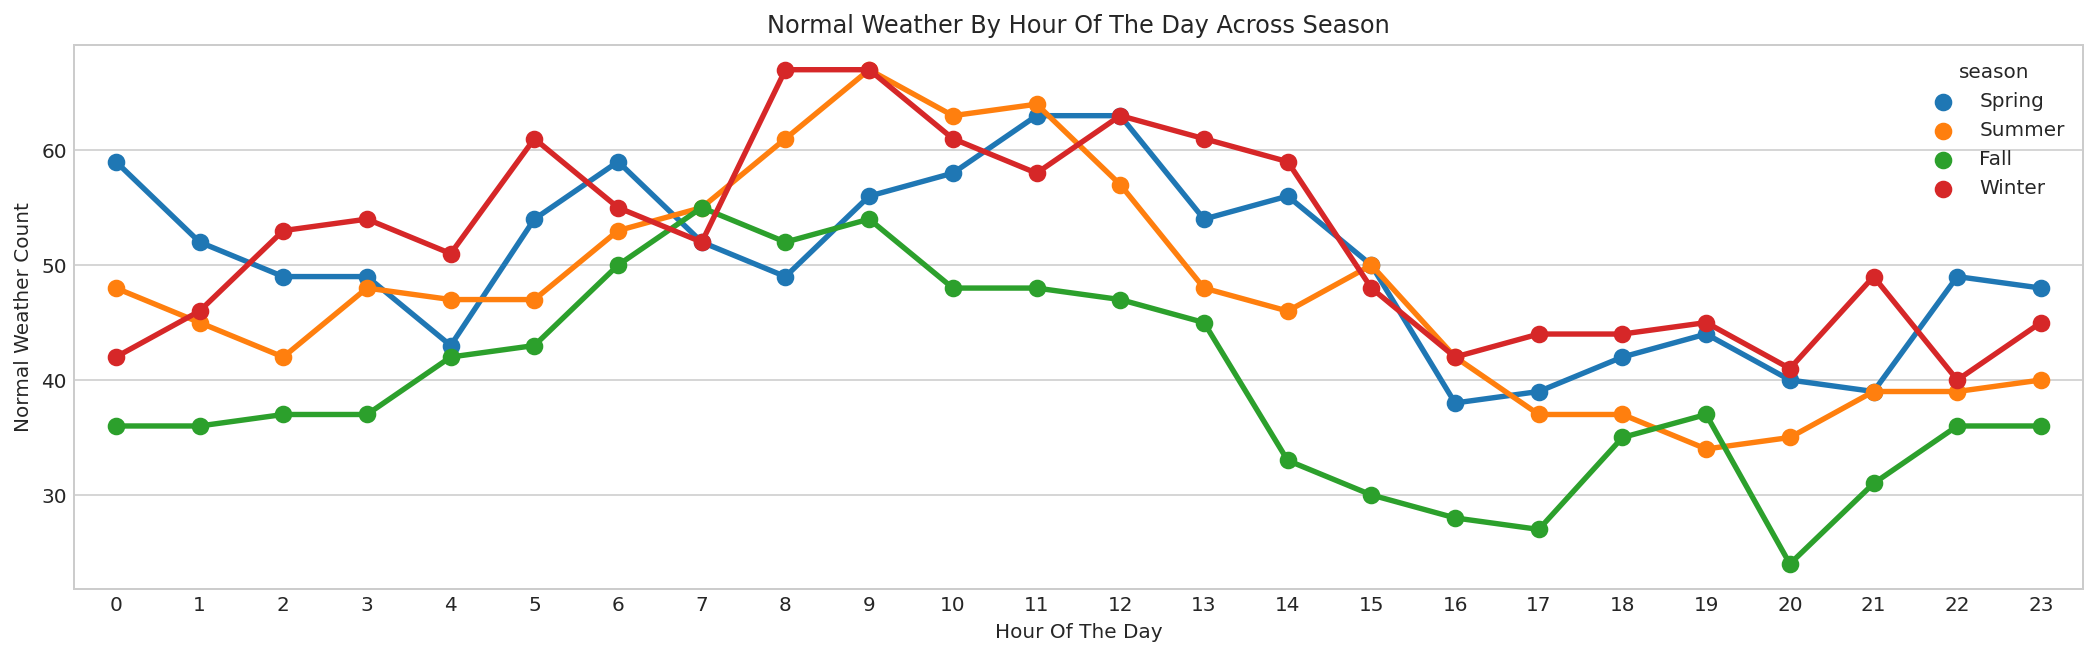

In [49]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.pointplot(x=data["hour"], y=data["count"], hue=data["season"], ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Normal Weather Count', title="Normal Weather By Hour Of The Day Across Season");

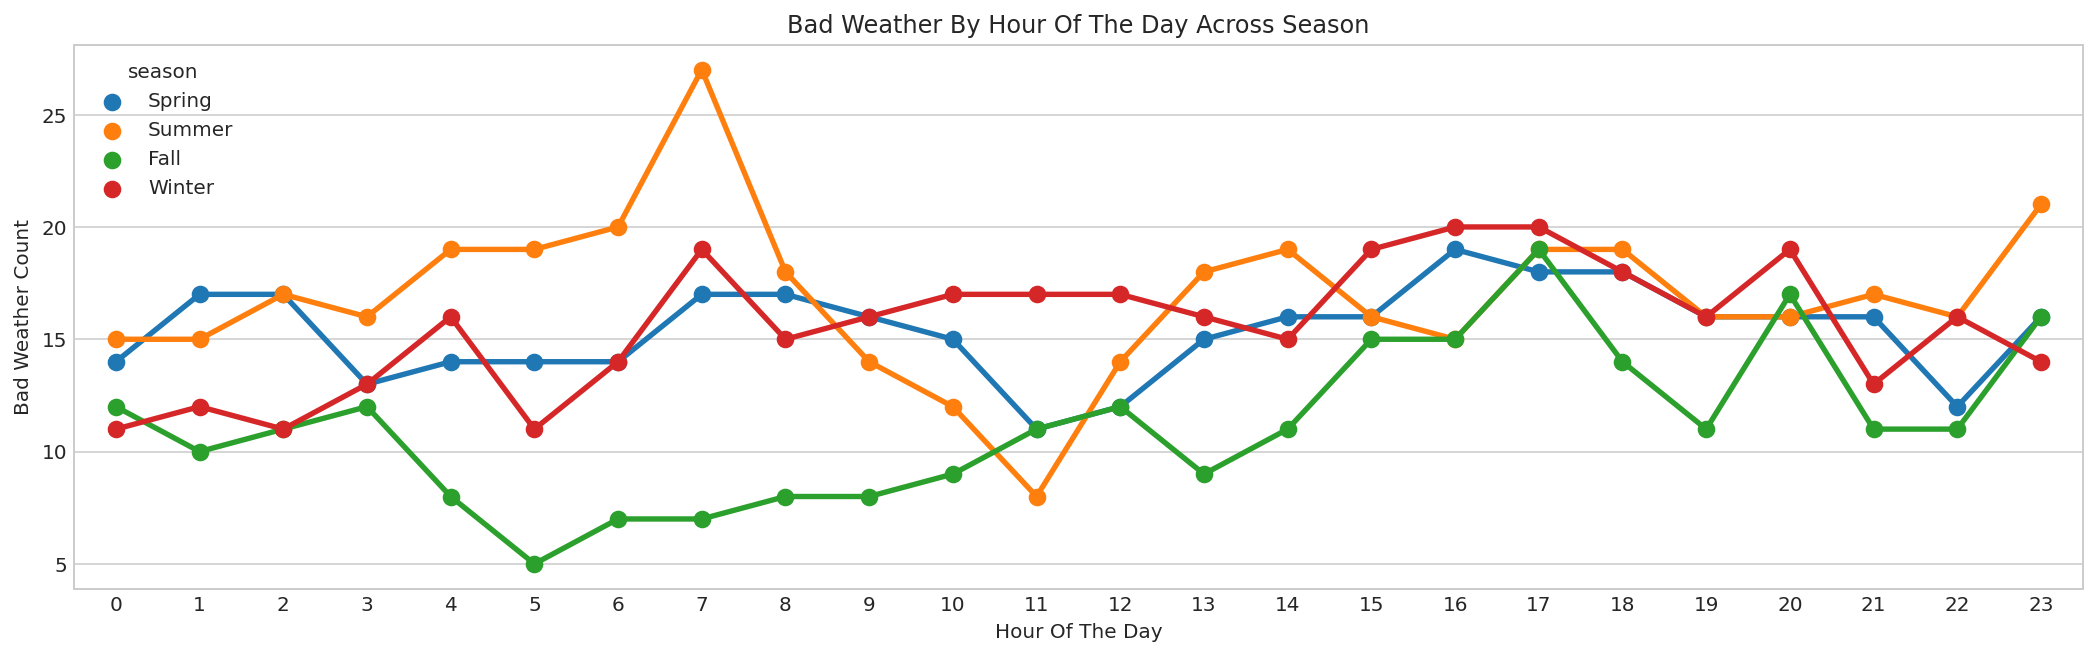

In [50]:
# Bad weather
season_map = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}
bad_weather = all_df[all_df['weather'] == 3][['hour', 'season']].copy()
data = pd.DataFrame({'count' : bad_weather.groupby(["hour","season"]).size()}).reset_index()
data['season'] = data['season'].map(lambda d : season_map[d])

fig, ax = plt.subplots(figsize=(18, 5))
sns.pointplot(x=data["hour"], y=data["count"], hue=data["season"], ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Bad Weather Count', title="Bad Weather By Hour Of The Day Across Season");

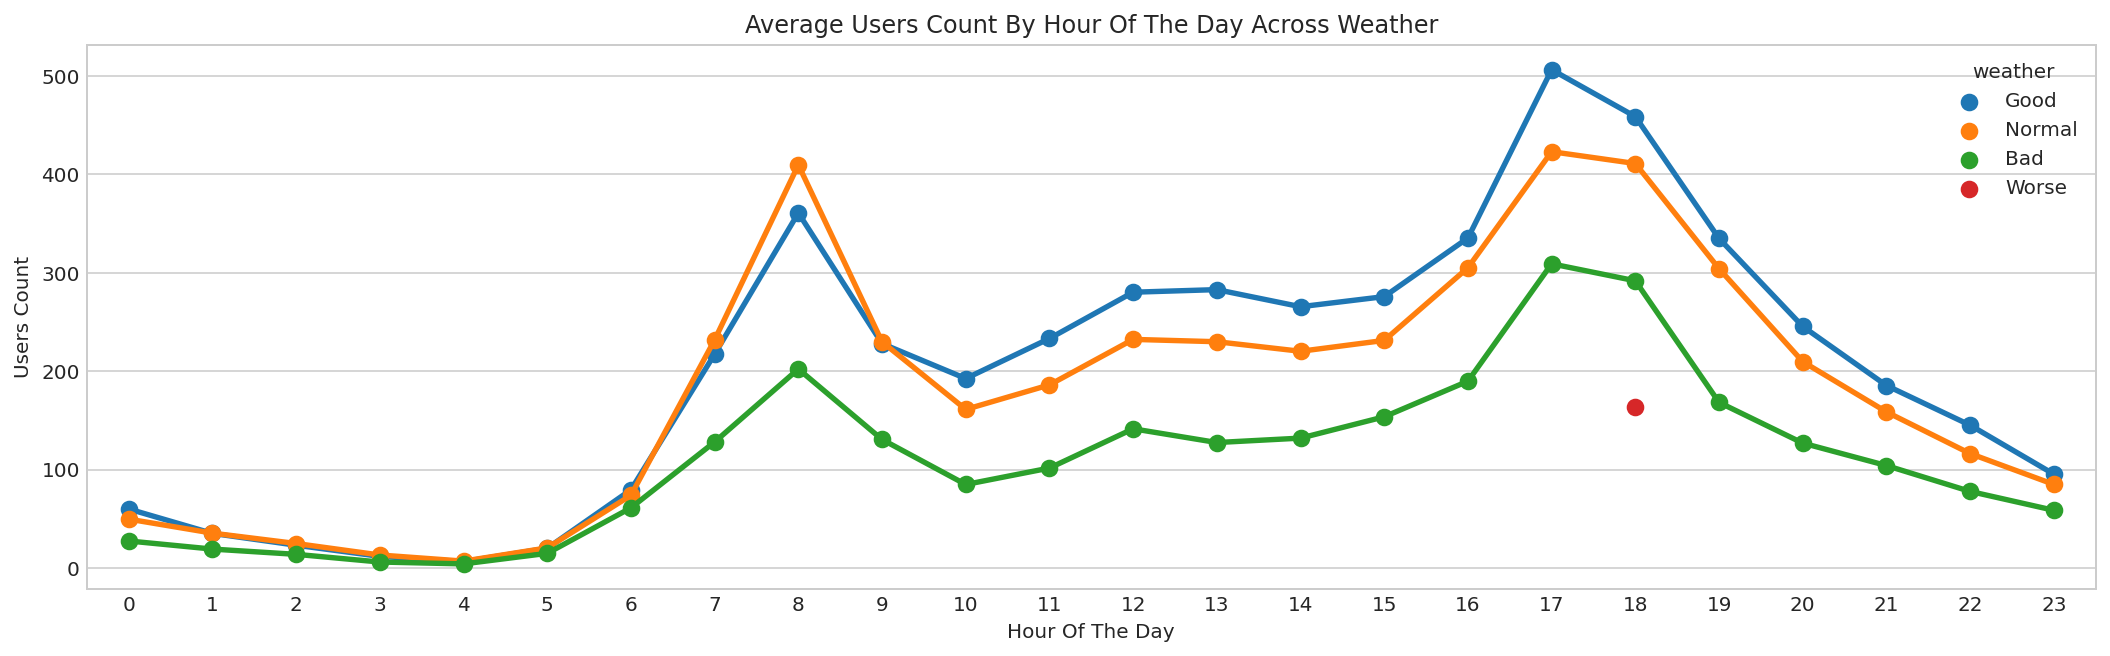

In [51]:

### ここまでEDAの見直しを行なった。weather毎でかつ、season毎の個数を表現。




#下の書き方よりも、短くわかりやすい
weather_map = {1:'Good', 2:'Normal', 3:'Bad', 4:'Worse'}
data = train_df.groupby(["hour","weather"])["count"].mean().reset_index()
data['weather'] = data['weather'].map(lambda d : weather_map[d])
fig, ax = plt.subplots(figsize=(18, 5))
sns.pointplot(x=data["hour"], y=data["count"], hue=data["weather"], ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Users Count', title="Average Users Count By Hour Of The Day Across Weather");


In [52]:
season_map = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}
#data = pd.DataFrame({'mean':train_df.groupby(["hour","season"], sort=True)["count"].mean()}).reset_index()
#data['season'] = data['season'].map(lambda d : season_map[d])
data = train_df.groupby(["hour","season"])["count"].mean().reset_index()
data['season'] = data['season'].map(lambda d : season_map[d])
data = data.rename(columns={'count':'mean'})
data
#data.sample(n=5)

,hour,season,mean
0,0,Spring,28.292035
1,0,Summer,58.473684
2,0,Fall,75.675439
3,0,Winter,57.877193
4,1,Spring,18.761062
...,...,...,...
91,22,Winter,126.412281
92,23,Spring,45.333333
93,23,Summer,101.684211
94,23,Fall,121.719298


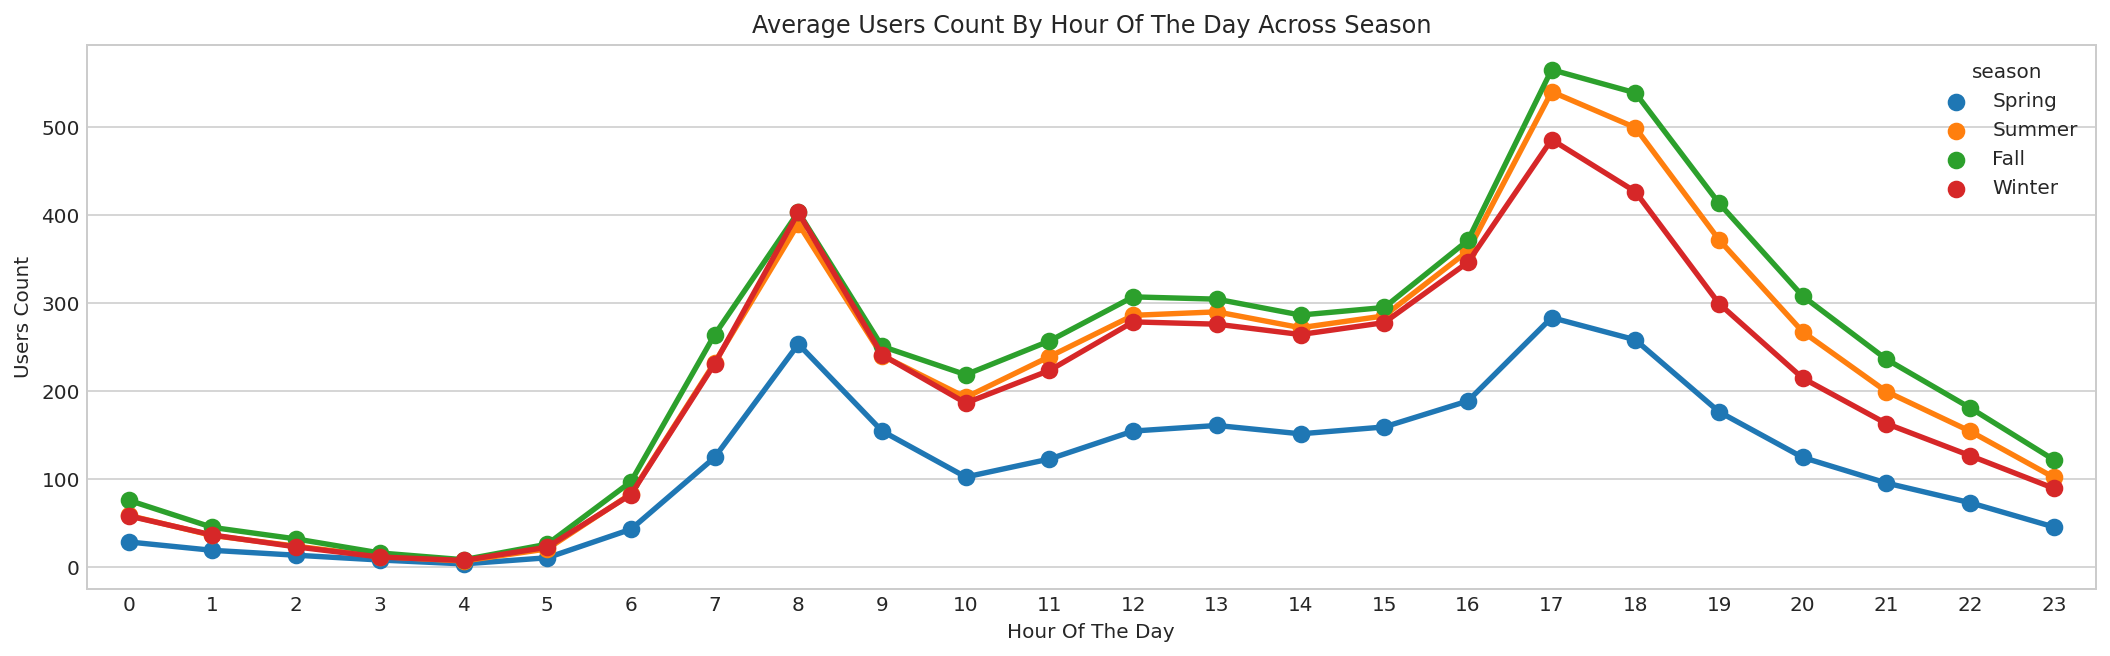

In [53]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.pointplot(x=data["hour"], y=data["mean"], hue=data["season"], ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Users Count', title="Average Users Count By Hour Of The Day Across Season");

In [54]:
#day_map = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
#hueOrder = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
#data = pd.DataFrame({'mean':train_df.groupby(["hour","dow"], sort=True)["count"].mean()}).reset_index()
#data['dow'] = data['dow'].map(lambda d : day_map[d])


day_map = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
hueOrder = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
data = train_df.groupby(["hour","dow"])["count"].mean().reset_index()
data['dow'] = data['dow'].map(lambda d : day_map[d])
data = data.rename(columns={'count':'mean'})
data.head(10) #.sample(n=5)

,hour,dow,mean
0,0,Monday,35.492308
1,0,Tuesday,27.328125
2,0,Wednesday,36.246154
3,0,Thursday,37.476923
4,0,Friday,53.234375
5,0,Saturday,98.212121
6,0,Sunday,96.227273
7,1,Monday,18.076923
8,1,Tuesday,11.904762
9,1,Wednesday,15.615385


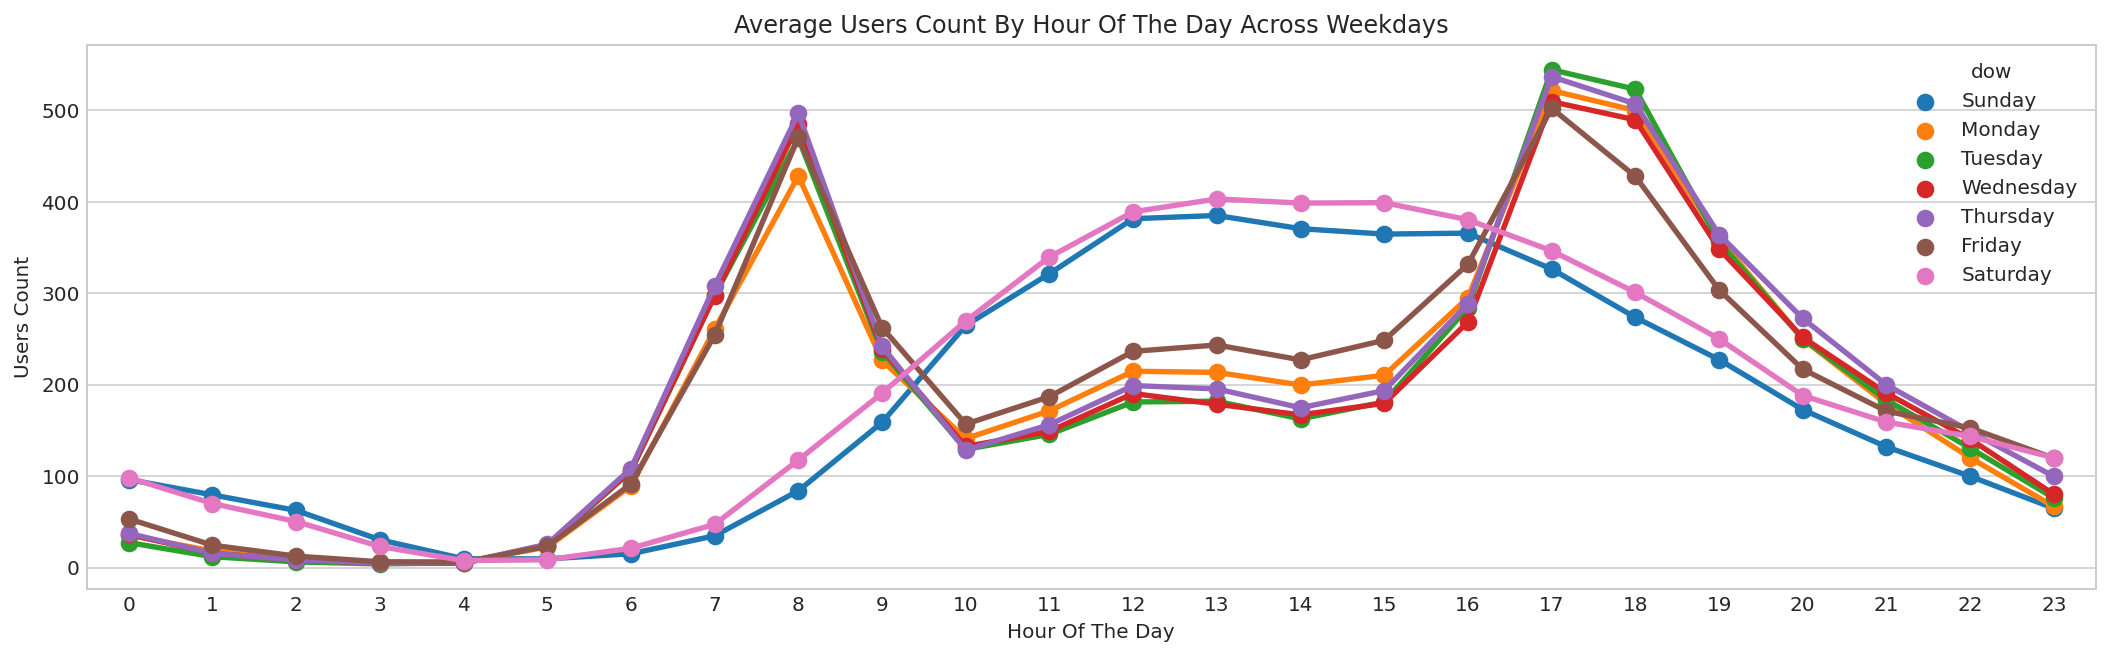

In [55]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.pointplot(x=data["hour"], y=data["mean"], hue=data["dow"], hue_order=hueOrder, ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Users Count', title="Average Users Count By Hour Of The Day Across Weekdays");

In [56]:
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
all_df['weekday'] = all_df['dow'].map(dayOfWeek)
all_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,data_set,date,day,month,year,hour,dow,woy,casual_log,registered_log,count_log,weekday
datetime,,,,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,train,2011-01-01,1,1,2011,0,5,52,1.386294,2.639057,2.833213,Saturday
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,train,2011-01-01,1,1,2011,1,5,52,2.197225,3.496508,3.713572,Saturday
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,train,2011-01-01,1,1,2011,2,5,52,1.791759,3.332205,3.496508,Saturday
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,train,2011-01-01,1,1,2011,3,5,52,1.386294,2.397895,2.639057,Saturday
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,train,2011-01-01,1,1,2011,4,5,52,0.000000,0.693147,0.693147,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,0,0,0,test,2012-12-31,31,12,2012,19,0,1,0.000000,0.000000,0.000000,Monday
2012-12-31 20:00:00,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,0,0,0,test,2012-12-31,31,12,2012,20,0,1,0.000000,0.000000,0.000000,Monday
2012-12-31 21:00:00,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,0,0,0,test,2012-12-31,31,12,2012,21,0,1,0.000000,0.000000,0.000000,Monday


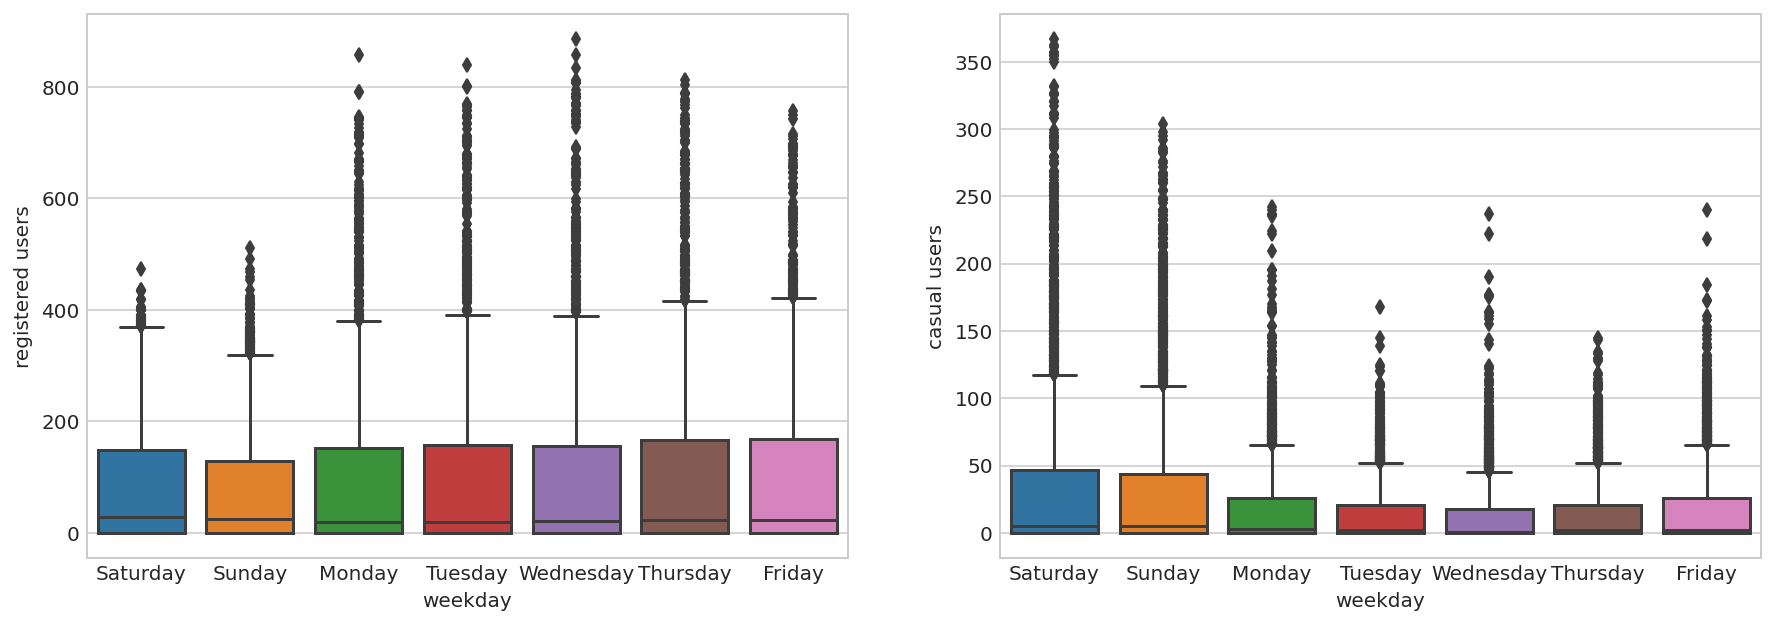

In [57]:


fig, axs = plt.subplots(1, 2, figsize=(15,5), sharex=False, sharey=False)

sns.boxplot(x='weekday', y='registered', data=all_df, ax=axs[0])
axs[0].set_ylabel('registered users')
axs[0].set_title('')

sns.boxplot(x='weekday', y='casual', data=all_df, ax=axs[1])
axs[1].set_ylabel('casual users')
axs[1].set_title('')

all_df.drop('weekday', axis=1, inplace=True);

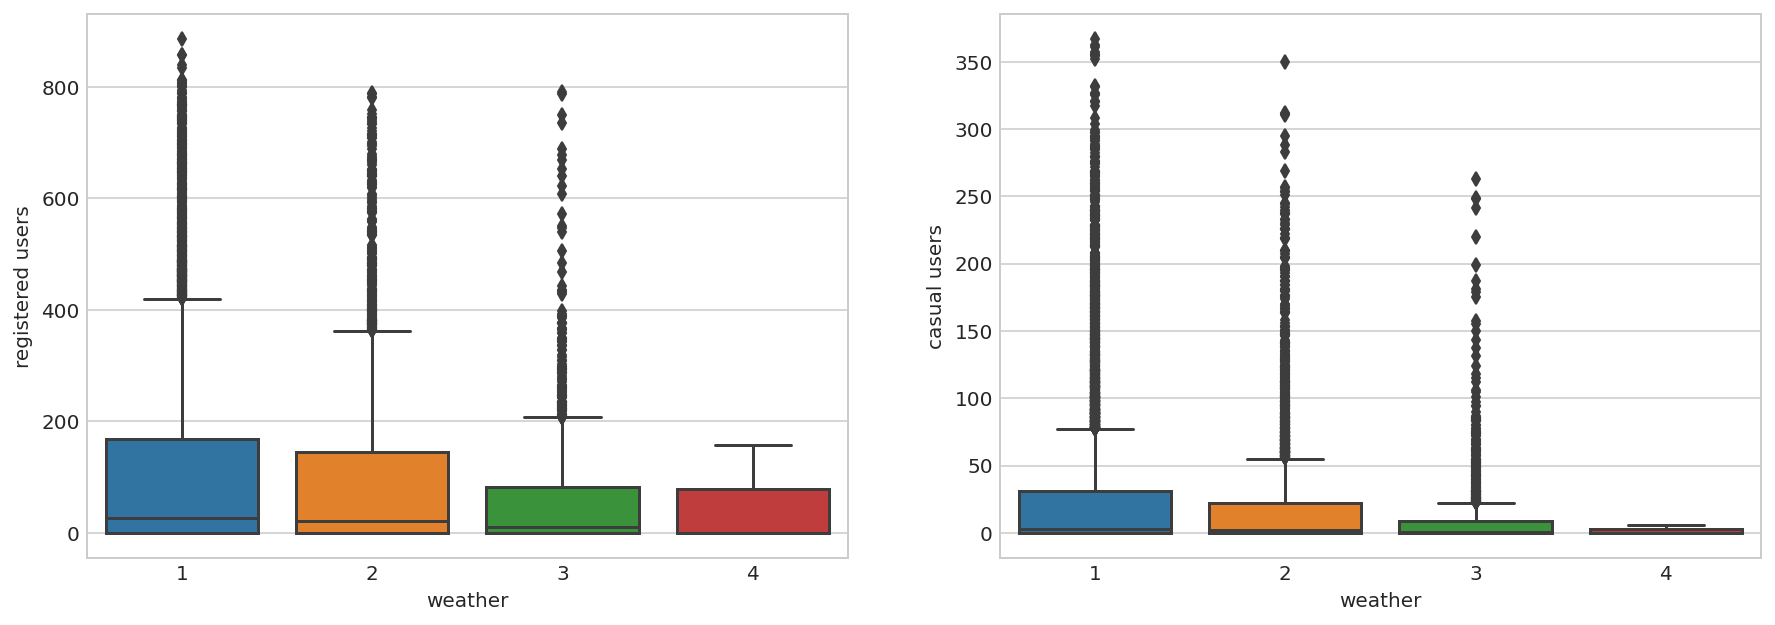

In [58]:
fig, axs = plt.subplots(1, 2, figsize=(15,5), sharex=False, sharey=False)

sns.boxplot(x='weather', y='registered', data=all_df, ax=axs[0])
axs[0].set_ylabel('registered users')
axs[0].set_title('')

sns.boxplot(x='weather', y='casual', data=all_df, ax=axs[1])
axs[1].set_ylabel('casual users')
axs[1].set_title('');

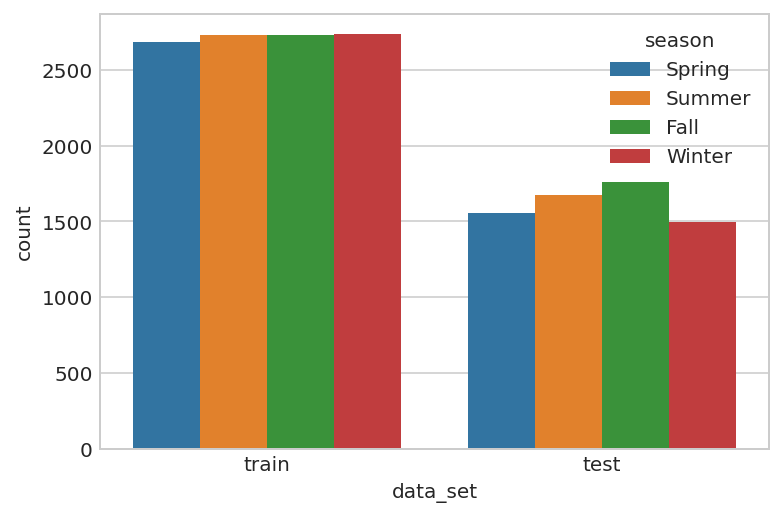

In [59]:
season_map = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}
data = all_df[['data_set', 'season']].copy()
data['season'] = data['season'].map(lambda d : season_map[d])
sns.countplot(x="data_set", hue="season", data=data);

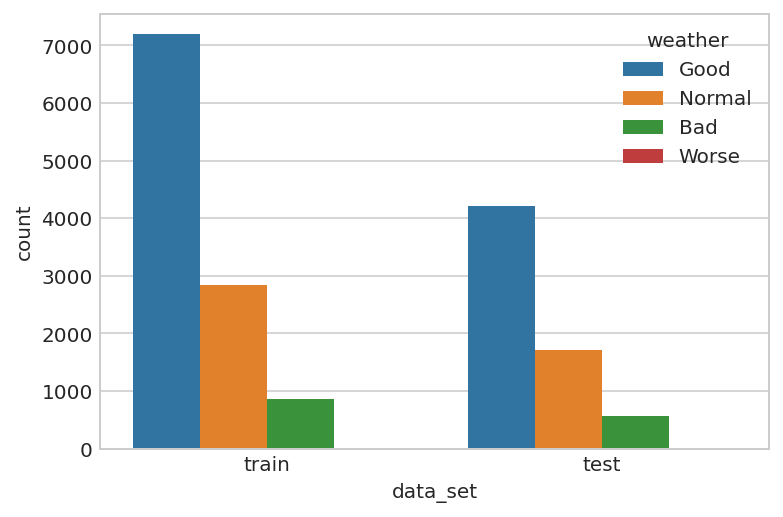

In [60]:
weather_map = {1:'Good', 2:'Normal', 3:'Bad', 4:'Worse'}
data = all_df[['data_set', 'weather']].copy()
data['weather'] = data['weather'].map(lambda d : weather_map[d])
sns.countplot(x="data_set", hue="weather", data=data);


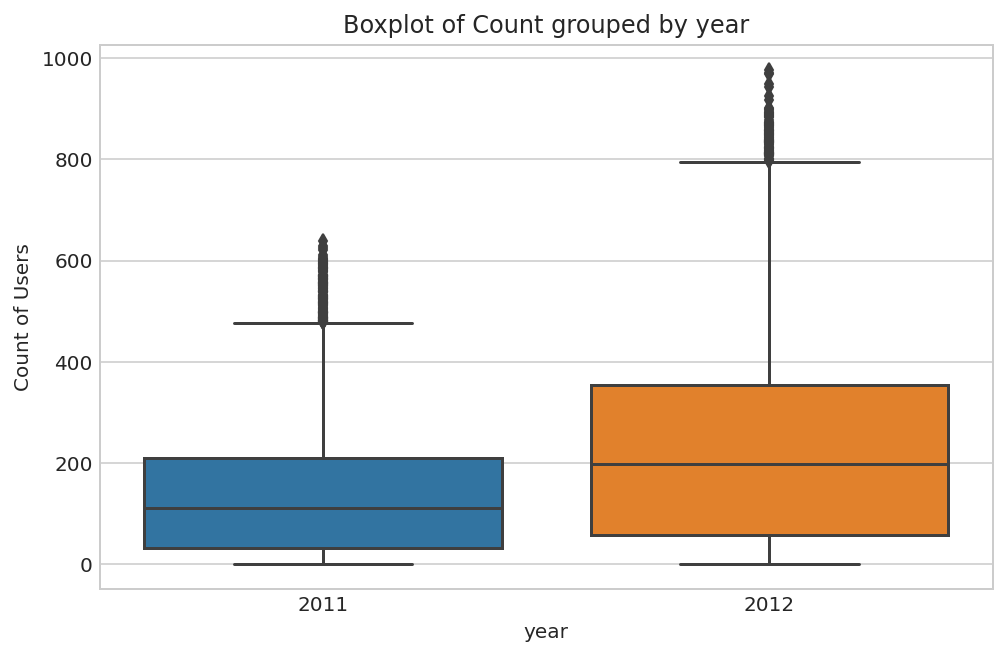

In [61]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='year', y='count', data=train_df)
plt.ylabel('Count of Users')
plt.title("Boxplot of Count grouped by year");